In [2]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

Distribuciones univariadas: distribuciones de una variable. 

Se pueden dividir en distribuciones
- Discretas: 
    - Las observaciones solo pueden tomar valores enteros.
    - Ej: el número de niños.

- Continuas:
    - Donde las variables de observación son valores continuos.
    - Ej: el peso de una persona.

# 6.1 Caracterización de una distribución

## 6.1.1 Centro de distribución

Cuando tenemos una muestra de datos, podemos caracterizar el centro de la distribución con diferentes parámetros. 

Los datos se pueden evaluar de 2 maneras:
1. Por su valor. 
2. Por su rango (su número de lista cuando se ordenan según su magnitud).

### a) Media

Por defecto, cuando hablamos del valor medio nos referimos a la media aritmética $\bar{x}$:

$ \bar{x} = \frac{\sum\limits_{i=1}^{n}x_i}{n} $.

In [2]:
x = list(range(10))

x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [3]:
np.mean(x)

4.5

Los datos de la vida real a menudo incluyen valores faltantes, que en muchos casos se reemplazan por nan ("No es un número"). 

In [4]:
xWithNan = x + [np.nan]

xWithNan

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, nan]

In [5]:
np.mean(xWithNan)

nan

In [6]:
# Elimina los valores nan de una muestra antes de ejecutar la media.

np.nanmean(xWithNan)

4.5

Con numpy, puede usar un parámetro de eje para actuar en filas, columnas o en todos los datos:

In [7]:
mat = [[1, 2],
       [3, 4]]

In [8]:
np.max(mat)

4

In [9]:
np.mean(mat)

2.5

In [10]:
np.max(mat, axis=0) 

array([3, 4])

In [11]:
np.mean(mat, axis=0)

array([2., 3.])

In [12]:
np.max(mat, axis=1) 

array([2, 4])

In [11]:
np.mean(mat, axis=1)

array([1.5, 3.5])

### b) Mediana

Es el valor que separa la mitad superior de la mitad inferior de una muestra de datos.

Corresponde para un número impar de muestras al percentil 50 de la muestra. 

No se ve afectada por puntos de datos atípicos. 

In [12]:
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [13]:
np.median(x)

4.5

Cuando una distribución es simétrica, la media y la mediana coinciden.

### c) Moda

También es llamado valor modal de una muestra.

Es el valor que ocurre con mayor frecuencia en esa muestra.

In [14]:
from scipy import stats

In [15]:
data = [1, 3, 4, 4, 7]

data

[1, 3, 4, 4, 7]

In [16]:
stats.mode(data)

C:\Users\usuario\AppData\Local\Temp\ipykernel_7028\3267261142.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(data)


ModeResult(mode=array([4]), count=array([2]))

In [17]:
print(f'La moda es {stats.mode(data)[0]} y ocurre {stats.mode(data)[1]} veces.')

La moda es [4] y ocurre [2] veces.


C:\Users\usuario\AppData\Local\Temp\ipykernel_7028\1947721629.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(f'La moda es {stats.mode(data)[0]} y ocurre {stats.mode(data)[1]} veces.')


### d) Media Geométrica

Se puede calcular mediante la media aritmética del logaritmo de los valores:

$media_{geometrica} = (\Pi_{i=1}^{n}x_i)^{1/n} = exp(\frac{\sum_i ln(x_i)}{n})$

In [18]:
x = np.arange(1,101)

x

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [19]:
stats.gmean(x)

37.992689344834304

Los números de entrada tienen que ser positivos.

## 6.1.2 Cuantificación de la variabilidad

### a) Rango 

Es la diferencia entre el valor de datos más alto y el más bajo.

In [20]:
x

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [21]:
rango = np.ptp(x) # Pico a pico

rango

99

In [22]:
# Como ya están ordenados

x[-1] - x[0]

99

Al calcular el rango de una muestra, lo único que debe observarse son los puntos de datos erróneos. Estos suelen ser valores atípicos, es decir, puntos de datos con un valor mucho más alto o más bajo que el resto de los datos. 

A menudo, tales puntos son causados por errores en la selección de la muestra o en el procedimiento de medición.

Hay una serie de pruebas para comprobar si hay valores atípicos. Una de ellas es comprobar los datos que se encuentran más de $ 1.5 * rango~intercuartílico~(RIC)$ por encima o por debajo del primer/tercer cuartil.

### b) Percentiles

CDF para
- Distribuciones continuas:

$ CDF(x) = \int_{-\infty}^{x} PDF(x')dx' $.

- Distribuciones discretas:

$ CDF(n) = \sum\limits_{i = -\infty}^{n} PMF(i) $.

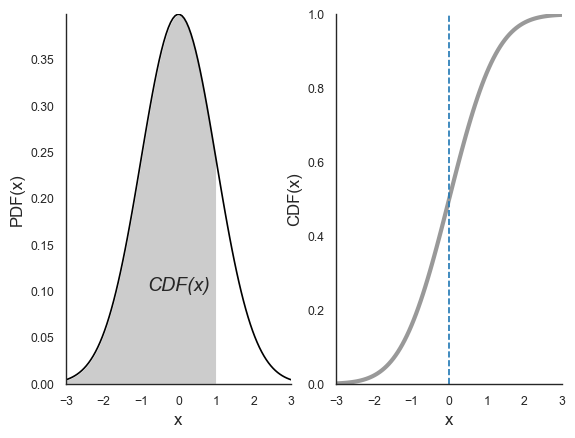

In [23]:
# Calculamos los valores

nd = stats.norm()

x = np.linspace(-3, 3, 100)
yp = nd.pdf(x)
y = nd.cdf(x)

x1 = np.linspace(-3, 1)
y1 = nd.pdf(x1)

# Graficamos

sns.set_context('paper')
sns.set_style('white')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.size'] = 12

fig, axs = plt.subplots(1, 2)

axs[0].plot(x, yp, 'k')
axs[0].fill_between(x1, y1, facecolor = '#CCCCCC')
axs[0].text(0, 0.1, 'CDF(x)', family = 'sans-serif', fontsize=14,
            horizontalalignment = 'center', style = 'italic')
axs[0].set_xlabel('x')
axs[0].set_ylabel('PDF(x)')
axs[0].margins(0, 0)
sns.despine()

axs[1].plot(x, y, '#999999', lw = 3)
axs[1].set_xlabel('x')
axs[1].set_ylabel('CDF(x)')
axs[1].margins(0, 0)
plt.vlines(0, 0, 1, linestyles = '--')
sns.despine()

plt.show()

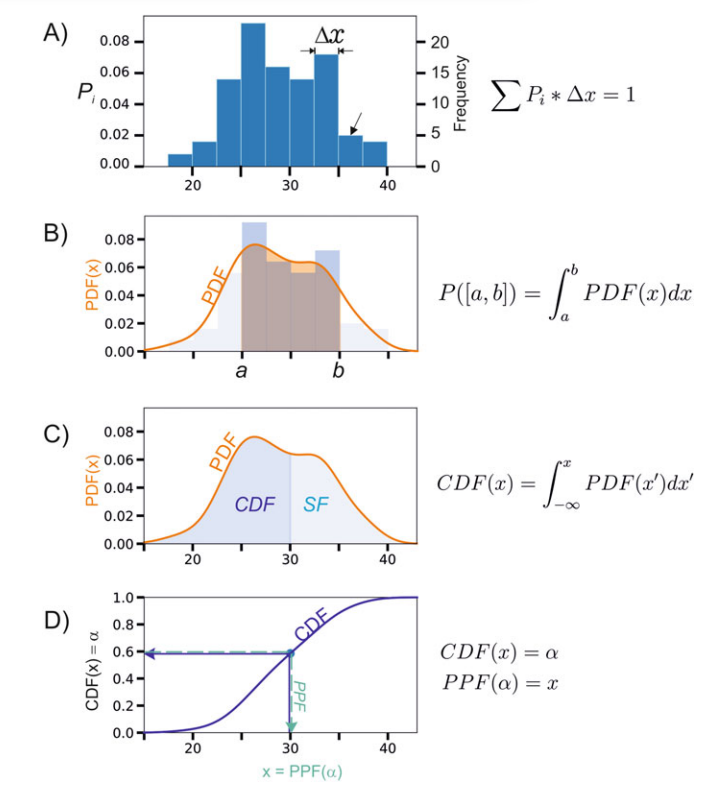

In [30]:
Image(filename='Imagenes/4.17.png')

La CDF es la integral de la PDF desde menos infinito hasta el valor dado y, por lo tanto, especifica el porcentaje de los datos que se encuentran por debajo de este valor.

La probabilidad de encontrar un valor de X entre a y b: 

$ P[a < X < b] = \int_a^b PDF(x)dx = CDF(b) - CDF(a)$.

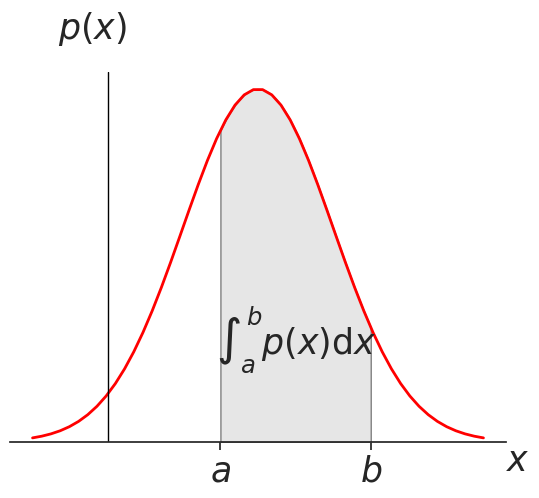

In [5]:
# Datos
a, b = -0.5, 1.5 
x = np.linspace(-3, 3)
func = stats.norm().pdf
y = func(x)

fig, ax = plt.subplots()
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(ymin=0)

# Hacer la región sombreada
ix = np.linspace(a, b)
iy = func(ix)
plt.fill_between(ix, iy, facecolor=[0.9, 0.9, 0.9], edgecolor=[0.5, 0.5, 0.5])

fs = 25
plt.text(0.5 * (a + b), 0.1, r"$\int_a^b p(x)\mathrm{d}x$", horizontalalignment='center', fontsize=fs)

plt.figtext(0.9, 0.05, '$x$', fontsize=fs)
plt.figtext(0.2, 0.95, '$p(x)$', fontsize=fs)
plt.axvline(x=-2, ymin=0, ymax=1, color='k', linewidth=1)

for loc in ['left', 'right', 'top']:
    ax.spines[loc].set_visible(False)

# Etiquete los bordes de la región sombreada
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'), fontsize=fs)
ax.set_yticks([])

plt.show()

Para distribuciones discretas, la integral debe reemplazarse por una suma, donde se debe tener cuidado si los puntos finales deben incluirse o no.

Los percentiles de las distribuciones continuas
- Son el inverso de la CDF.
- Dan el valor por debajo del cual ocurre un porcentaje dado de los valores de los datos. 

Para distribuciones discretas, los percentiles no se definen de manera única. 

Con frecuencia se encontrarán percentiles específicos:
- Para encontrar el rango de 2 colas que incluye el 95% de los datos, uno tiene que encontrar los percentiles 2.5 y 97.5 de la distribución de la muestra.

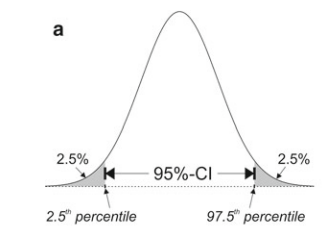

In [33]:
Image(filename='Imagenes/6.3a.png')

- El percentil 50 es la mediana. 
- Son importantes los cuartiles superior e inferior, es decir, los percentiles 25 y 75. La diferencia entre ellos se llama el rango intercuartil (RIC).

Los cuartiles mediano, superior e inferior se utilizan para la visualización de datos en diagramas de caja.

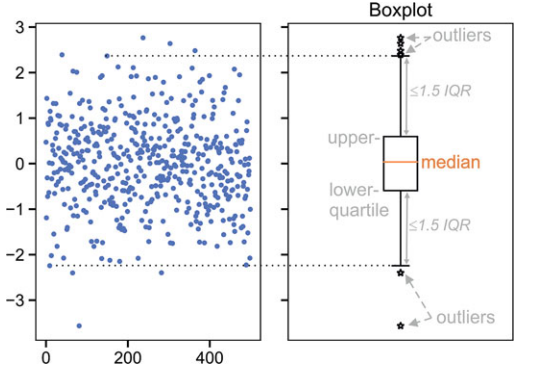

In [34]:
Image(filename='Imagenes/4.13.png')

In [24]:
cuartil_inferior = stats.norm().ppf(.25)

print(f'El cuartil inferior de la distribución normal estándar es {cuartil_inferior}.\n')

mediana = stats.norm().ppf(.5)

print(f'La mediana de la distribución normal estándar es {mediana}.\n')

cuartil_superior = stats.norm().ppf(.75)

print(f'El cuartil superior de la distribución normal estándar es {cuartil_superior}.')

El cuartil inferior de la distribución normal estándar es -0.6744897501960817.

La mediana de la distribución normal estándar es 0.0.

El cuartil superior de la distribución normal estándar es 0.6744897501960817.


#### 6.1.2.1 Desviación estándar y varianza

numpy usa el parámetro (n-ddof) en el divisor para distinguir entre parámetros de población y de muestra. 

ddof significa "grados de libertad delta".

En numpy, el valor predeterminado para ddof en el cálculo de la varianza y la desviación estándar se establece en ddof = 0.

En pandas, el valor predeterminado es ddof = 1.

In [25]:
data = np.arange(7,14)

data

array([ 7,  8,  9, 10, 11, 12, 13])

In [26]:
np.std(data) # ddof = 0

2.0

In [27]:
np.std(data, ddof = 0) # Desviación estándar de la población

2.0

In [28]:
np.std(data, ddof = 1) # Desviación estándar de la muestra, típicamente usado

2.160246899469287

In [29]:
df = pd.DataFrame(data)

df

,0
0,7
1,8
2,9
3,10
4,11
5,12
6,13


In [30]:
std = df.std() # Devuelve una Serie pandas

std # Usa 1 gl por defecto

0    2.160247
dtype: float64

In [31]:
std.values # El correspondiente array numpy 

array([2.1602469])

### c) Error Estándar

Es la estimación de la desviación estándar de un coeficiente. 

Cuantos más puntos de datos tengamos para estimar el valor medio, mejor será nuestra estimación de la media.

El error estándar muestral de la media (SE o SEM) es

$ SEM = \frac{s}{\sqrt{n}} = \sqrt{\frac{\sum\limits_{i=1}^{n}(x_i - \bar{x})^2}{n-1}} * \frac{1}{\sqrt{n}} $

Ej: tenemos 100 puntos de datos de una distribución normal de alrededor de 5. 

Con 100 puntos de datos, la desviación estándar de nuestra estimación (el error estándar de la media) es 10 veces menor que la desviación estándar de la muestra. 

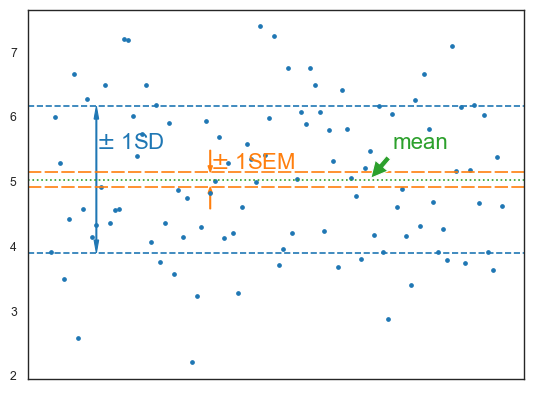

In [32]:
# Generamos los datos

np.random.seed(123)
x = np.random.randn(100) + 5

# Calcule las ubicaciones de "desviación estándar" y "error estándar"

sdVal = np.std(x, ddof=1)
seVal = np.std(x, ddof=1) / np.sqrt(len(x))
sd = np.mean(x) + sdVal * np.array([-1, 1])
se = np.mean(x) + seVal * np.array([-1, 1])

# Configurar la trama

plt.rcParams.update({'font.size': 16})
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'

# Graficar los datos

plt.plot(x, '.', color='C0')
plt.axhline(np.mean(x), ls='dotted', color='C2')
plt.axhline(sd[0], ls='--', color='C0')
plt.axhline(sd[1], ls='--', color='C0')

# Líneas para SEM

lh = []
lh.append(plt.axhline(se[0], ls='dashed', color='C1'))
lh.append(plt.axhline(se[1], ls='--', color='C1'))

# Haz que las líneas sean discontinuas

dashes = [8, 2]  # 20 puntos de descuento, 5 de descuento
for line in lh:
    line.set_dashes(dashes)

curAxis = plt.gca()
curAxis.set_xticklabels(())

# Hacer las flechas

plt.arrow(10, np.mean(x), 0, sdVal, width=0.2,
          length_includes_head=True, head_length=0.2, head_width=1, color='C0')

plt.arrow(10, np.mean(x), 0, -sdVal, width=0.2,
          length_includes_head=True, head_length=0.2, head_width=1, color='C0')

plt.arrow(35, np.mean(x) - 4 * seVal, 0, 3 * seVal, width=0.2,
          length_includes_head=True, head_length=0.1, head_width=1, color='C1')

plt.arrow(35, np.mean(x) + 4 * seVal, 0, -3 * seVal, width=0.2,
          length_includes_head=True, head_length=0.1, head_width=1, color='C1')

fs = 16
plt.text(10, 5.5, '$\pm$ 1SD', fontsize=fs, color='C0')
plt.text(35, 5.2, '$\pm$ 1SEM', fontsize=fs, color='C1')
plt.annotate('mean', (70, np.mean(x)), xycoords='data', fontsize=fs, color='C2',
             xytext=(75, 5.5), textcoords='data',
             arrowprops=dict(facecolor='C2', shrink=0.05))

# Ajuste el tamaño de la figura para una mejor visualización

plt.rcParams['figure.figsize'] = [8, 6]  # Ancho, alto en pulgadas

plt.show()

### d) Intervalos de Confianza

Es una estimación de rango.

Se calcula en un nivel de confianza designado. El más común es del 95%. 

IC del 95%: rango de valores que contiene el 95% de los datos. 

IC del 95% con parámetros desconocidos: rango que contiene el valor verdadero del parámetro con una probabilidad del 95%. 

Es común establecer el IC de un parámetro estimado. 

Pueden ser de una o 2 colas.

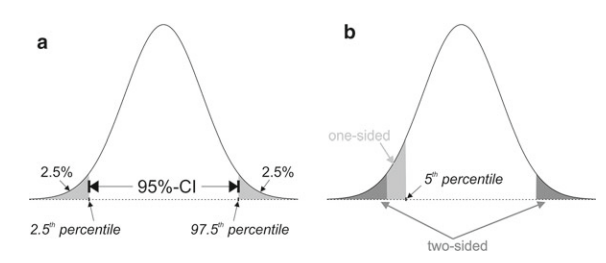

In [46]:
Image(filename='Imagenes/6.3.png')

Ej: Suponga que ha producido un lote de clavos, con una longitud prevista de 10 cm. 

Mide la longitud de 100 clavos y obtiene una función de distribución empírica para ellos. 

- "¿Los clavos producidos coinciden con la longitud prevista de 10 cm?" o "¿La longitud de los clavos es diferente de 10 cm?" 
    - Miramos si el valor de referencia (10 cm) se encuentra dentro de las 2 colas IC del 95% de los clavos. 

- "¿Los clavos miden más de 10 cm?"
    - Verificamos si el IC del 95% inferior es mayor que 10 cm. 
    
- "¿Los clavos miden menos de 10 cm?"
    - Verificamos si el IC del 95% superior es menor de 10 cm. 

Si la distribución de muestreo es simétrica y unimodal (decae suavemente en ambos lados del máximo), será posible aproximar el intervalo de confianza por

$ ci = media \pm std * N_{PPF}(\frac{\alpha}{2}) $

donde $std$ es la desviación estándar y $N_{PPF}$ la función de punto percentil (PPF) para la distribución normal estándar.

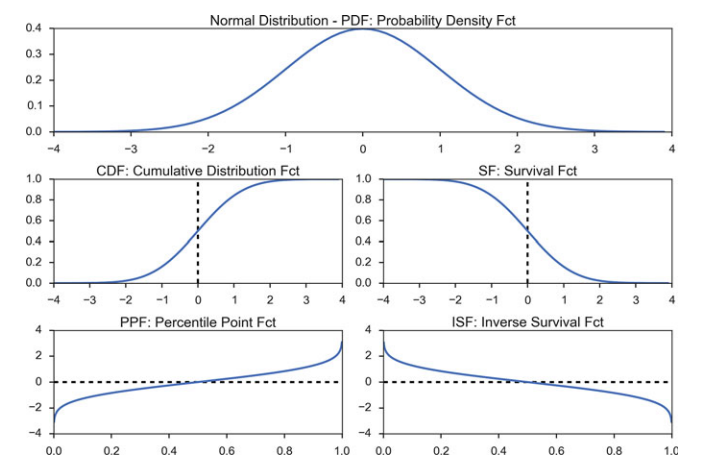

In [47]:
Image(filename='Imagenes/6.5.png')

IC bilaterales del 95 %. 

In [33]:
print(f'El intervalo de confianza inferior de la distribución normal estándar es: {stats.norm.ppf(.025):3.2f}')

El intervalo de confianza inferior de la distribución normal estándar es: -1.96


In [34]:
print(f'El intervalo de confianza superior de la distribución normal estándar es: {stats.norm.ppf(.975):3.2f}')

El intervalo de confianza superior de la distribución normal estándar es: 1.96


Notas: 
- Para calcular el IC para el valor medio, la desviación estándar tiene que ser reemplazada por el error estándar y la distribución normal típicamente con la distribución t

$ ci = media \pm se * t_{df,\alpha} $

- Si la distribución es sesgada, 

$ ci = media \pm std * N_{PPF}(\frac{\alpha}{2}) $ 

no es apropiado y no proporciona los IC correctos, y se deben usar los percentiles exactos de la distribución correspondiente.

## 6.1.3 Parámetros que describen la forma de una distribución

Las funciones de distribución continua se caracterizan por su ubicación y su escala. 

Ej: 
- Para la distribución normal, (ubicación, escala) están dadas por (media, sd) de la distribución.
- Para la distribución uniforme, están dados por el (inicio, final) del rango donde la distribución es diferente de cero.

### a) Ubicación

Determina la ubicación o el cambio de una distribución ($x_0$):

$p_{x_0} (x) = p(x − x_0)$.

Ej: media, mediana y moda.

### b) Escala

Describe el ancho de una distribución de probabilidad ($s$). 

Si es
- Grande: la distribución será más amplia. 
- Pqueño: la distribución será más concentrada. 

Si la densidad de probabilidad existe para todos los valores de $s$, entonces la densidad (como una función del parámetro de escala únicamente) satisface las distribuciones continuas

$ PDF_s (x) = \frac{PDF(\frac{x}{s})}{s} $

donde $ PDF_s$ es la versión estandarizada de la $PDF$.

### c) Parámetros de forma

Parámetros de forma: parámetros más allá de la ubicación y la escala. 

Casi todas las distribuciones que se usan con frecuencia tienen 1 o 2 parámetros.

Sesgo: 
- Las distribuciones están "sesgadas" si se apartan de la simetría. 
- Ej: para mediciones que solo pueden tomar valores positivos, podemos inferir que los datos tienen una distribución sesgada si la desviación estándar es más de la mitad de la media. Tal asimetría se conoce como sesgo positivo. El sesgo opuesto, negativo, es raro.

Curtosis:
- Es una medida del “pico” de la distribución de probabilidad. 
- Dado que la distribución normal tiene una curtosis de 3, el exceso de $curtosis = curtosis - 3$ es 0 para la distribución normal. 
- Distribuciones
    - Platicúrticas: con exceso de curtosis negativo.
    - Leptocúrticas: con exceso de curtosis positivo.

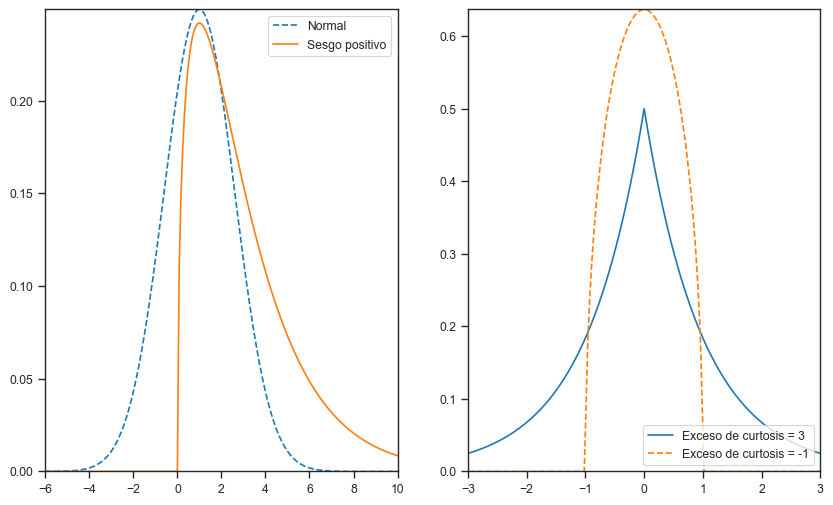

In [36]:
# Crea la figura y las subtramas

fig, axs = plt.subplots(1, 2, figsize = (10, 6))

# Sesgo

t = np.linspace(-6, 10, 201)
normal = stats.norm.pdf(t, 1, 1.6)
chi2 = stats.chi2.pdf(t, 3)

axs[0].plot(t, normal, '--', label = 'Normal')
axs[0].plot(t, chi2, label = 'Sesgo positivo')
axs[0].xaxis.set_ticks_position('bottom')
axs[0].yaxis.set_ticks_position('left')
axs[0].margins(0, 0)
axs[0].legend(loc = 'upper right')

# Curtosis

t = np.linspace(-3, 3, 201)
platykurtic = stats.laplace.pdf(t)

wigner = np.zeros(np.size(t))
wignerIndex = np.abs(t) <= 1
wigner[wignerIndex] = 2 / np.pi * np.sqrt(1 - t[wignerIndex] ** 2)

axs[1].plot(t, platykurtic, label = 'Exceso de curtosis = 3')
axs[1].plot(t, wigner, '--', label = 'Exceso de curtosis = -1')
axs[1].xaxis.set_ticks_position('bottom')
axs[1].yaxis.set_ticks_position('left')
axs[1].margins(0, 0)
axs[1].legend(loc = 'lower right')

plt.show()

## 6.1.4 Métodos importantes de funciones de densidad de probabilidad

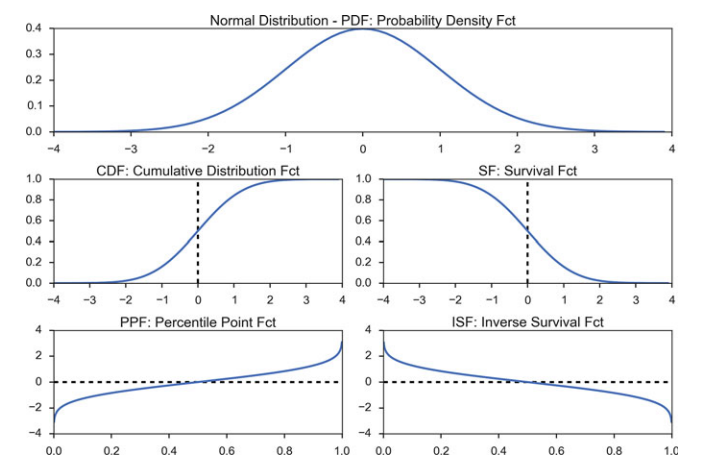

In [2]:
Image(filename='Imagenes/6.5.png')

Función de densidad de probabilidad (PDF): 
- Para obtener la probabilidad de que la variable aparezca en un determinado intervalo: debe integrar la PDF en ese rango. 
- Ej: ¿Cuál es la probabilidad de que un hombre mida entre 160 y 165 cm de altura?
    
Función de distribución acumulativa (CDF):
- Da la probabilidad de obtener un valor menor que el valor dado. 
- Ej: ¿Cuál es la probabilidad de que un hombre mida menos de 165 cm de altura?
    
Función de Supervivencia (SF):
- $SF = 1 - CDF$ 
- Da la probabilidad de obtener un valor mayor al valor dado. 
- Interpretación: proporción de datos que “sobreviven” por encima de cierto valor. 
- Ej: ¿Cuál es la probabilidad de que un hombre sea más grande que 165 cm?

Función de punto percentil (PPF): 
- Inversa de la CDF. 
- Interpretación: "Dada una cierta probabilidad, ¿cuál es el valor de entrada correspondiente para el CDF?".
- Ej: dado que estoy buscando un hombre que es más pequeño que el 95 % de todos los demás hombres, ¿de qué tamaño debe ser el sujeto?
    
Función de supervivencia inversa (ISF): 
- Ej: Dado que estoy buscando un hombre que es más grande que el 95 % de todos los demás hombres, ¿qué tamaño debe tener el sujeto?

Muestras aleatorias variadas (RVS): 
- Variables aleatorias, es decir, números aleatorios, de la distribución dada.

Pasos Python:
- 1º paso
    - Crear la distribución usando todos sus parámetros requeridos (ej: nd = stats.norm(mu, sigma)). 
    - Es una distribución congelada, es decir, es una distribución con todos los parámetros requeridos fijos, ¡no una función todavía! 
- 2º paso
    - Decide qué función desea usar de esta distribución y calcula el valor de la función para la entrada x deseada (ej: y = nd.cdf(x)).

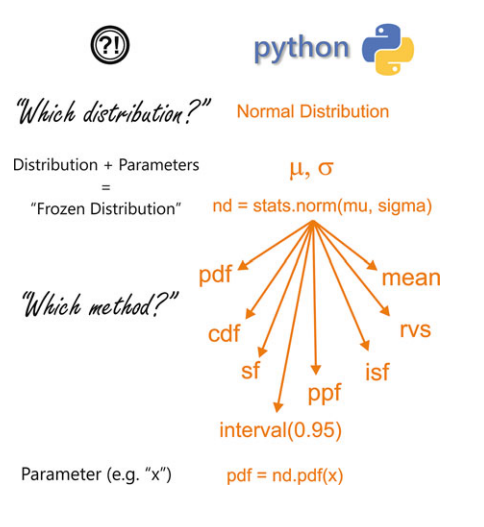

In [3]:
Image(filename='Imagenes/6.6.png')

In [37]:
# Distribución normal con mu 5 y sigma 3

my_dist = stats.norm(5,3) # Crear distribución congelada

my_dist

In [38]:
x = np.linspace(-5, 15, 101)

y = my_dist.cdf(x) # Calcular la CFD correspondiente

In [40]:
df = pd.DataFrame({
                    'x': x,
                    'CDF': y
})

df.head()

,x,CDF
0,-5.0,0.000429
1,-4.8,0.000544
2,-4.6,0.000687
3,-4.4,0.000864
4,-4.2,0.001082


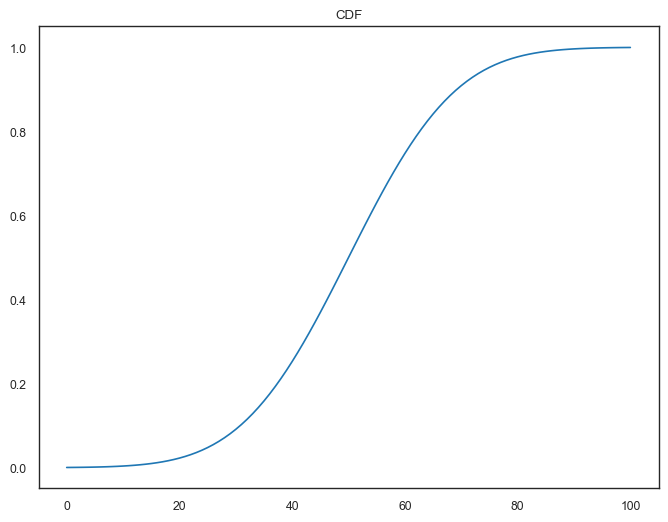

In [41]:
# Grafico la CDF

plt.plot(df['CDF'], data = df)

plt.title("CDF")

plt.show()

# 6.2 Distribuciones discretas

Se definen por su función de masa de probabilidad (PMF).

Tipos
- Bernoulli
- Binomial
- Poisson
- Hipergeométrica

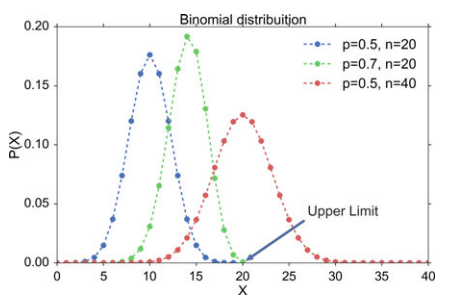

In [12]:
Image(filename='Imagenes/6.7.png')

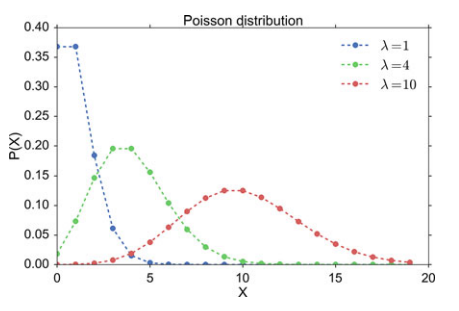

In [13]:
Image(filename='Imagenes/6.8.png')

Diferencias entre ellas: 
- Binomial
    - Tiene un límite superior inherente.
    - Ej: cuando lanzas los dados 5 veces, cada lado puede salir un máximo de 5 veces.

- Poisson
    - No tiene un límite superior inherente.
    - Ej: "¿Cuántas personas conoces?" No hay un límite superior claro. 

- Distribución hipergeométrica:
    - Es similar a la distribución binomial.
    - Mientras que la distribución binomial se basa en muestras (muestreo con reemplazo), las muestras para distribución hipergeométrica no son independientes (muestreo sin reemplazo).

## 6.2.1 Distribución de Bernoulli 

Es el caso más simple de una distribución univariante.

Es la base de la distribución binomial.

Tiene solo 2 estados
- 1
    - Con probabilidad $p$
- 0 
    - Con probabilidad $q = 1 − p$

El parámetro $p$ determina completamente la distribución. 

Ej: lanzar una moneda. Si lanzamos una moneda (y la moneda no está amañada), la probabilidad de que salga "cara" es $p_{caras} = 0.5$.

$ P(X = x) = \begin{cases} p & \text{si } x = 1, \\ 1 - p & \text{si } x = 0, \end{cases} $

In [42]:
p = 0.5

In [43]:
bernoulli_dist = stats.bernoulli(p)
bernoulli_dist

Como es una “función de distribución congelada”, nos permite calcular todo lo que queremos para esta distribución. 

Ej: la probabilidad de que salga cara 0 o 1 veces viene dada por la PMF.

In [44]:
p_tails = bernoulli_dist.pmf(0)
print(f'La probabilidad de que salga cara 0 veces es {p_tails}.\n')

p_heads = bernoulli_dist.pmf(1)
print(f'La probabilidad de que salga cara 1 vez es {p_heads}.')

La probabilidad de que salga cara 0 veces es 0.5.

La probabilidad de que salga cara 1 vez es 0.5.


Podemos simular 10 ensayos de Bernoulli con

In [45]:
ensayos = bernoulli_dist.rvs(10) # variables aleatorias

ensayos

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

## 6.2.2 Distribución Binomial

Está asociada con la pregunta “De un número (fijo) de intentos, ¿cuántos tendrán éxito?”. 

Ej:
- De 10 lanzamientos, ¿cuántas veces caerá cara arriba una moneda? 
- De los niños nacidos en un hospital determinado en un día determinado, ¿cuántos de ellos serán niñas? 
- ¿Cuántos estudiantes en un salón de clases tendrán ojos verdes? 
- ¿Cuántos mosquitos, de un enjambre, morirán cuando se les rocíe con insecticida?

Realizamos $n$ experimentos repetidos, donde la probabilidad de éxito viene dada por el parámetro $p$, y sumamos el número de éxitos. 

Este número de éxitos está representado por la variable aleatoria $X$. El valor de $X$ está entonces entre $0$ y $n$. 

La variable aleatoria $X$ tiene una distribución binomial con parámetros $p$ y $n$, $X \thicksim B(n, p)$ y la PMF en $X == k$ viene dada por la ecuación:

$P[X = k] = \begin{cases}\binom{n}{k} p^k (1 - p)^{n-k} & \text{si } 0 \leq k \leq n \\ 0 & \text{en otro caso} \end{cases} \, 0 \leq p \leq 1, \, n \in \mathbb{N}$

donde $ \binom{n}{k} = \frac{n!}{k!(n-k)!}$  

El procedimiento es el mismo que para la distribución de Bernoulli, con un parámetro adicional, $n$. 

Ej: 4 lanzamientos de moneda.

1º: Generamos la función de distribución congelada.

In [46]:
# Parámetros

n = 4

p = 0.5 

In [47]:
# Distribución congelada

binomial_dist = stats.binom(n, p)

binomial_dist

2º: Calculamos, por ej, las probabilidades de con qué frecuencia salen caras durante esos cuatro lanzamientos, dadas por el PMF para los valores de 0 a 4:

In [48]:
binomial_dist.pmf(np.arange(5))

# Probabilidad de que nunca salga cara | de que salga 1 vez | ....

array([0.0625, 0.25  , 0.375 , 0.25  , 0.0625])

In [50]:
# Alternativamente

for k in range(n + 1):
    prob = stats.binom.pmf(k, n, p)
    if k == 0:
        resultado = "nunca salga cara"
    elif k == 1:
        resultado = "salga 1 vez cara"
    else:
        resultado = f"salga {k} veces cara"
    print(f"La probabilidad de que {resultado} es del {prob:.3f}.\n")

La probabilidad de que nunca salga cara es del 0.062.

La probabilidad de que salga 1 vez cara es del 0.250.

La probabilidad de que salga 2 veces cara es del 0.375.

La probabilidad de que salga 3 veces cara es del 0.250.

La probabilidad de que salga 4 veces cara es del 0.062.



La suma de todas las probabilidades tiene que sumar 1:

$ p_0 + p_1 + ... + p_{n-1} = \sum\limits_{i = 0}^{n-1} p_i = 1 $

In [51]:
sum_binomial = 0

for i in range(5):
    sum_binomial += binomial_dist.pmf(np.arange(5))[i]

print(f'La suma de la probabilidades es: {sum_binomial}')

La suma de la probabilidades es: 1.0


$\textbf{Ejemplo: Prueba binomial}$ 

Supongamos que tenemos un juego de mesa que depende del lanzamiento de un dado y otorga especial importancia al lanzamiento de un 6. 

En un juego en particular, el dado se lanza 235 veces y el 6 sale 51 veces. 

Si el dado es justo, esperaríamos que saliera 6 $\frac{235}{6} = 39.17$ veces. 

¿Es la proporción de 6 significativamente más alta de lo que se esperaría por casualidad, en la hipótesis nula de un dado justo? 

Para encontrar una respuesta a esta pregunta usando la prueba binomial, consultamos la distribución binomial con $n = 235$ y $p = \frac{1}{6}$, para determinar a partir del PMF la probabilidad de encontrar exactamente 51 6s en una muestra de 235 si la verdadera probabilidad de sacar un 6 en cada prueba es $\frac{1}{6}$. 

Luego encontramos la probabilidad de encontrar exactamente 52, exactamente 53, y así sucesivamente hasta 235, y sumamos todas estas probabilidades. 

De esta forma, calculamos la probabilidad de obtener el resultado observado (51 6s) o un resultado más extremo (> 51 6s) suponiendo que el dado es justo. 

In [52]:
k = 51

n = 235

p = 1/6

In [54]:
# Prueba de una cola

p_0 = stats.binomtest(k, n, p, alternative = 'greater')

p_0

BinomTestResult(k=51, n=235, alternative='greater', statistic=0.2170212765957447, pvalue=0.026544245711690846)

In [55]:
p_value_0 = p_0.pvalue
p_value_0

0.026544245711690846

In [56]:
alpha = .05

if p_value_0 < alpha:
    print('No es significativo al nivel del 5%, por lo tanto es poco probable.')
else:
    print('Es significativo al nivel del 5%, por lo tanto es probable')

No es significativo al nivel del 5%, por lo tanto es poco probable.


Un dado podría arrojar muy pocos 6s tan fácilmente como demasiados y sería sospechoso, por lo que deberíamos usar la prueba de 2 colas que divide el 5% de probabilidad entre las 2 colas.

In [57]:
# Prueba de 2 colas (por defecto)

p_1 = stats.binomtest(k, n, p)

p_1

BinomTestResult(k=51, n=235, alternative='two-sided', statistic=0.2170212765957447, pvalue=0.043747970182399856)

In [59]:
statistic = p_1.statistic

pvalue = p_1.pvalue

In [60]:
print(f'La posibilidad de sacar 51 o más 6-s es {statistic:5.3f}, y la posibilidad de un evento tan extremo como 51 o más es {pvalue:5.3f}')

La posibilidad de sacar 51 o más 6-s es 0.217, y la posibilidad de un evento tan extremo como 51 o más es 0.044


In [63]:
if pvalue < alpha:
    print('No es significativo al nivel del 5%, por lo tanto es poco probable.')
else:
    print('Es significativo al nivel del 5%, por lo tanto es probable')

No es significativo al nivel del 5%, por lo tanto es poco probable.


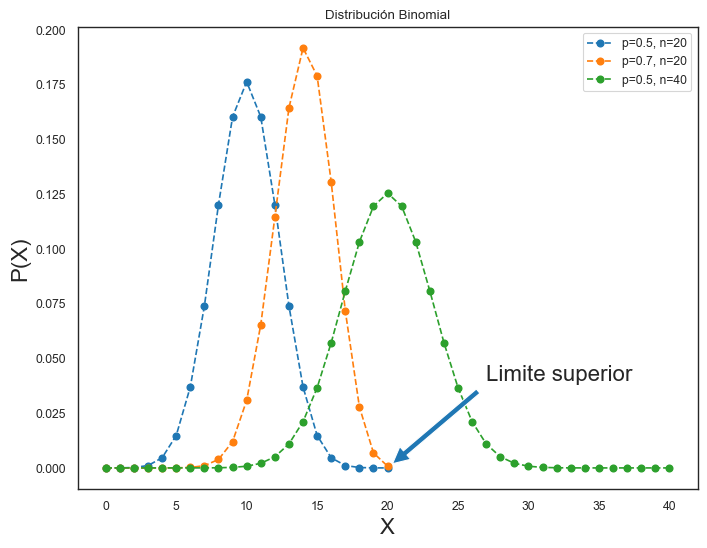

In [64]:
# Seleccione arbitrariamente 3 números totales y 3 probabilidades

ns = [20, 20, 40]
ps = [0.5, 0.7, 0.5]

# Para cada par (p, n), trace los PMF binomiales correspondientes

for (p,n) in zip(ps, ns):
    bd = stats.binom(n,p)       # Generamos la distribución congelada
    x = np.arange(n+1)          # Generamos los valores de x
    plt.plot(x, bd.pmf(x), 'o--', label = 'p={0:3.1f}, n={1}'.format(p,n))

# Dar formato al gráfico

plt.legend()
plt.title('Distribución Binomial')
plt.xlabel('X')
plt.ylabel('P(X)')
plt.annotate('Limite superior', xy = (20,0), xytext = (27,0.04), arrowprops = dict(shrink=0.05))

plt.show()

## 6.2.3 Distribución de Poisson 

El nombre proviene del matemático Siméon-Denis Poisson (1781–1840). 

Es similar a la distribución binomial. 

Estamos examinando el número de veces que ocurre un evento.

Diferencia 
- La distribución binomial analiza cuántas veces registramos un éxito en un número total fijo de intentos.
- La distribución de Poisson mide cuántas veces ocurre un evento discreto, en un período de espacio o tiempo continuo. 
    - No existe un valor “total” $n$, y la distribución de Poisson está definida por un solo parámetro, el “valor esperado”.

Ej: 
- ¿Cuántos centavos encontraré en mi camino a casa? 
- ¿Cuántos niños darán a luz en el hospital hoy?
- ¿Cuántos productos venderé después de emitir un nuevo comercial de televisión? 
- ¿Cuántas picaduras de mosquitos recibió hoy después de haber rociado con insecticida? 
- ¿Cuántos defectos habrá por cada 100 m de cuerda vendida? 

La variable aleatoria $X$ cuenta el número de eventos puede tomar cualquier valor entero no negativo. 

En lugar de tener un parámetro $p$ que representa un componente de probabilidad como en la distribución binomial, tenemos el parámetro “lambda” ($\lambda$) que representa el número “promedio” o “esperado” de eventos que sucederán dentro de nuestro experimento. 

Las ecuaciones para la media y la varianza de la distribución binomial y la distribución de Poisson son

|Distribución|Media             |Varianza                  |
|------------|------------------|--------------------------|
|Binomial    |n  p             |n  p  (1-p)             |
|Poisson     |$\lambda$         |$\lambda$                 |


La función de masa de probabilidad de la distribución de Poisson viene dada por


$ P[X==k] = \frac{e^{-\lambda}\lambda^k}{k!} $ 

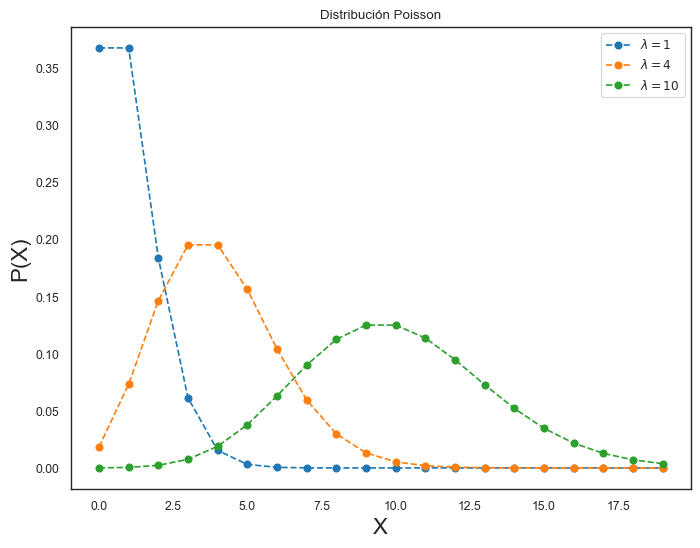

In [65]:
# Seleccionar arbitrariamente 3 valores lambda

lambdas = [1, 4, 10]

k = np.arange(20)       # Genero los valores de x
markersize = 8
for par in lambdas:
    plt.plot(k, stats.poisson.pmf(k, par), 'o--', label = '$\lambda={0}$'.format(par))

# Dar formato al gráfico

plt.legend()
plt.title('Distribución Poisson')
plt.xlabel('X')
plt.ylabel('P(X)')

plt.show()

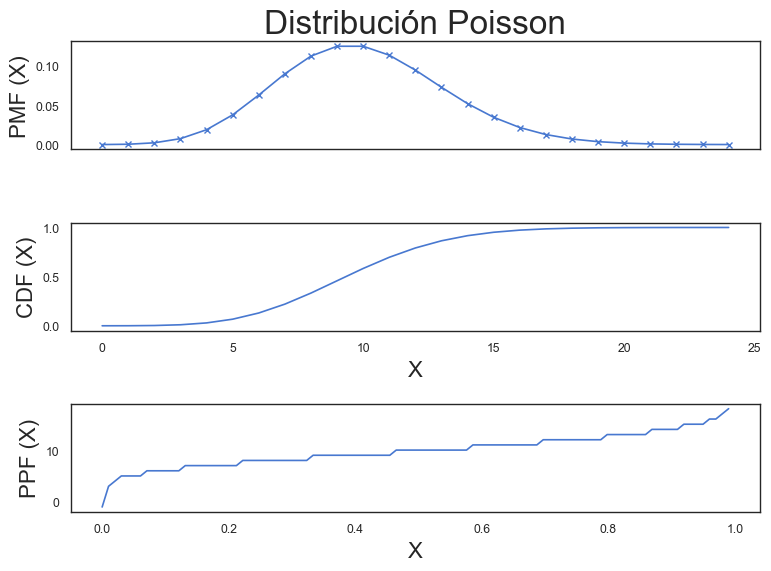

In [66]:
sns.set_palette(sns.color_palette('muted'))

fig, ax = plt.subplots(3, 1)

k = np.arange(25)
pd = stats.poisson(10)

ax[0].plot(k, pd.pmf(k), 'x-')
ax[0].set_title('Distribución Poisson', fontsize = 24)
ax[0].set_xticklabels([])
ax[0].set_ylabel('PMF (X)')

ax[1].plot(k, pd.cdf(k))
ax[1].set_xlabel('X')
ax[1].set_ylabel('CDF (X)')

y = np.linspace(0, 1, 100)
ax[2].plot(y, pd.ppf(y))
ax[2].set_xlabel('X')
ax[2].set_ylabel('PPF (X)')

plt.tight_layout()

plt.show()

## 6.2.4 Distribución Hipergeométrica

Diferencias con la distribución binomial
- La distribución binomial trata con eventos independientes.
- La distribución hipergeométrica trata con eventos dependientes.  

Ej: Tome un conjunto de 2 bolas, una blanca y una negra. 

Cuando selecciona la primera bola de esta población, la probabilidad de obtener una blanca es del 50%. Si reemplaza la bola y vuelve a seleccionar otra, la posibilidad de obtener una blanca nuevamente es nuevamente del 50%. Pero si ha seleccionado una bola blanca y no reemplaza la bola, solo queda la bola negra, y su probabilidad de seleccionar una bola blanca nuevamente es 0%. 

Hay una diferencia entre la selección con reemplazo (binomial) y sin reemplazo (hipergeométrica).

Ej: Supongamos que tenemos una colección de 20 animales, de los cuales 7 son perros. 

Queremos saber la probabilidad de encontrar un número dado de perros si elegimos al azar 12 de los 20 animales.

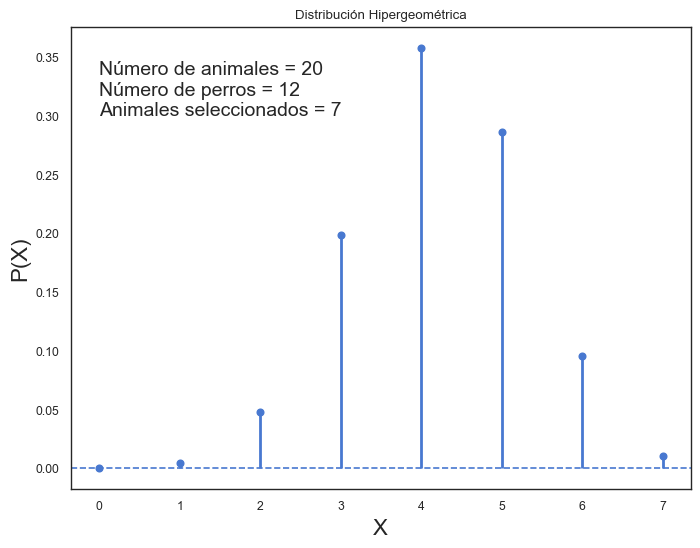

In [67]:
# Seleccione arbitrariamente 3 números totales y 3 probabilidades

M = 20
n = 7
N = 12

hd = stats.hypergeom(M, n, N)  # Genero la destribución congelada
x = np.arange(n+1)          # Genero los valores de x
fig = plt.Figure(figsize = (10,4))
plt.plot(x, hd.pmf(x), 'o')
plt.text(0, 0.3, f'Número de animales = {M}\n' +
            f'Número de perros = {N}\n' +
            f'Animales seleccionados = {n}', fontsize = 14)
plt.vlines(x, 0, hd.pmf(x), lw = 2)
plt.axhline(0, ls = '--')

# Dar formato al gráfico

plt.title('Distribución Hipergeométrica')
plt.xlabel('X')
plt.ylabel('P(X)')

plt.show()

Para un tamaño de la muestra menor al 5% de la población total, hay poca diferencia entre la distribución hipergeométrica y la distribución binomial.

# 6.3 Distribución Normal 

También llamada "distribución gaussiana".

Es la más importante de todas las funciones de distribución, ya que los valores medios de todas las funciones de distribución se aproximan a una distribución normal para números de muestra lo suficientemente grandes.

Matemáticamente, la distribución normal se caracteriza por un valor medio $\mu$ y una desviación estándar $\sigma$:

$ p_{\mu,\sigma}(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{\frac{-(x-\mu)^2}{2\sigma^2}} $ 

donde $-\infty < x < \infty$, y $p_{\mu,\sigma}$ es la PDF de la distribución normal. 

A diferencia de la PMF de distribuciones discretas, que se define solo para enteros discretos, la PDF se define para valores continuos. 

Distribución normal estándar: 
- Distribución normal con una media de 0 y desviación estándar de 1.
- También llamada distribución z. 

Para números de muestra más pequeños, la distribución de la muestra puede mostrar bastante variabilidad. Por ejemplo, observe 25 distribuciones generadas al muestrear 100 números de una distribución normal. 

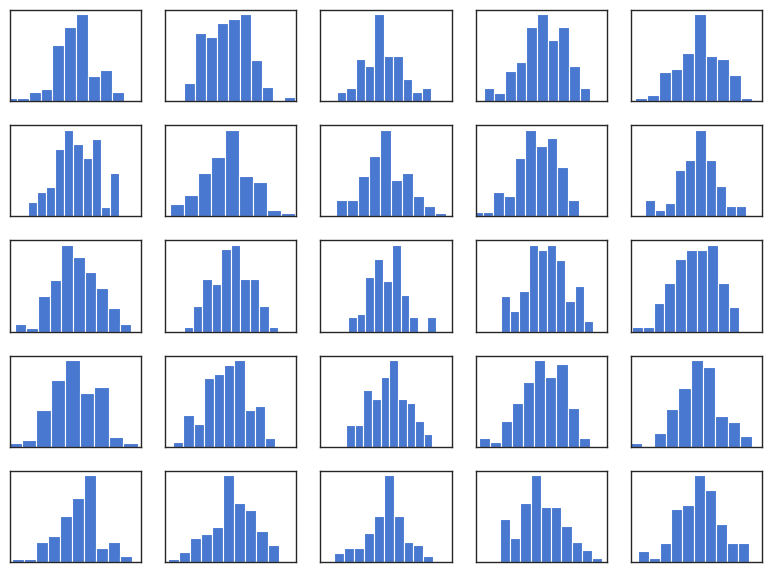

In [68]:
# Establecer los parámetros

columnas = 5
n = 100
media = 0
sd = 1

# Grafique los histogramas de las distribuciones de muestra y formatee los gráficos

plt.figure()

for i in range(columnas):
    for j in range(columnas):
        data = stats.norm.rvs(media, sd, size = n)
        plt.subplot(columnas, columnas, columnas * i + j + 1)
        plt.hist(data)
        plt.gca().set_xlim([-3, 3])
        plt.gca().set_xticks(())
        plt.gca().set_yticks(())
        plt.gca().set_xticklabels(())
        plt.gca().set_yticklabels(())

plt.tight_layout()

plt.show()

In [72]:
# Verifique la media de 1000 distribuciones de muestra normales

muestras = 1000
n = 100

medias = np.ones(muestras) * np.nan

for i in range(muestras):
    data = stats.norm.rvs(media, sd, size = n)
    medias[i] = np.mean(data)

print(f'La media de las medias de 1000 distribuciones muestrales es {medias.mean()}')
print(f'El error estándar de la media, con {n} muestras, es {np.std(medias)}')

La media de las medias de 1000 distribuciones muestrales es 0.0013767160807071595
El error estándar de la media, con 100 muestras, es 0.10616171339219338


Distribución normal con parámetros $\mu$ y $\sigma$: $N(\mu,\sigma)$. 

Si las variables aleatorias (rvs) de $X$ se distribuyen normalmente con expectativa $\mu$ y desviación estándar $\sigma$, se escribe: $X \in N(\mu,\sigma)$. 

In [75]:
def show_SD(axis, xi, yi, text):
    """Mostrar el área cubierta por 1/2/3 SD"""

    fc = '#DDDDDD'
    axis.plot(x, y)
    axis.fill_between(xi, yi, facecolor = fc)

    axis.text(0, 0.05, text, horizontalalignment = 'center', fontsize = 18)
    axis.set_xlim([-3.5, 3.5])
    axis.set_ylim([-0.0, 0.5])
    sns.despine(ax = axis, left = True)
    axis.set_yticks([])

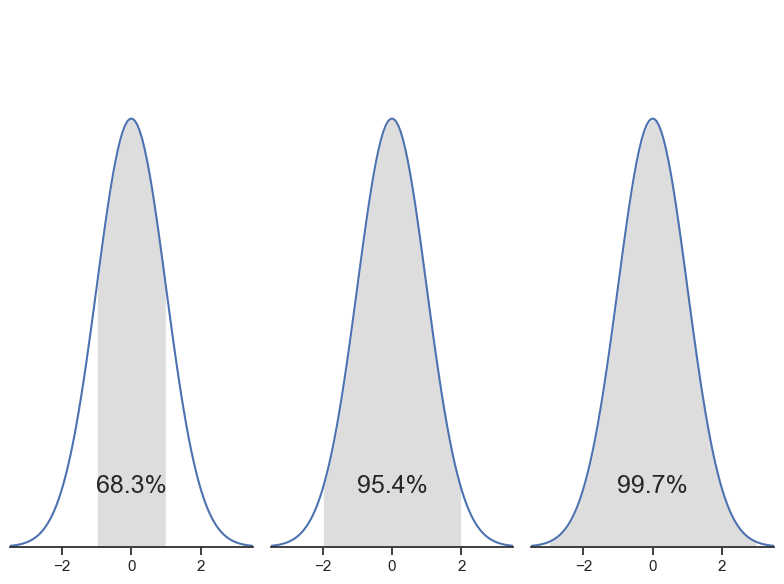

In [77]:
# Datos

nd = stats.norm()

x = np.linspace(-3.5, 3.5, 100)
x1 = np.linspace(-1, 1)
x2 = np.linspace(-2, 2)
x3 = np.linspace(-3, 3)

y = nd.pdf(x)
y1 = nd.pdf(x1)
y2 = nd.pdf(x2)
y3 = nd.pdf(x3)

# Gráfico

sns.set(context='notebook')
sns.set_style('ticks')
fig, axs = plt.subplots(1, 3, sharey=True)

show_SD(axs[0], x1, y1, '68.3%')
show_SD(axs[1], x2, y2, '95.4%')
show_SD(axs[2], x3, y3, '99.7%')

plt.tight_layout()

plt.show()

| Rango         | Probabilidad de estar dentro del rango (%) | Probabilidad de estar fuera del rango (%) |
|---------------|--------------------------------------|-------------------------------|
| media ± 1sd    | 68.3                                 | 31.7                          |
| media ± 2sd    | 95.4                                 | 4.6                           |
| media ± 3sd    | 99.7                                 | 0.27                          |

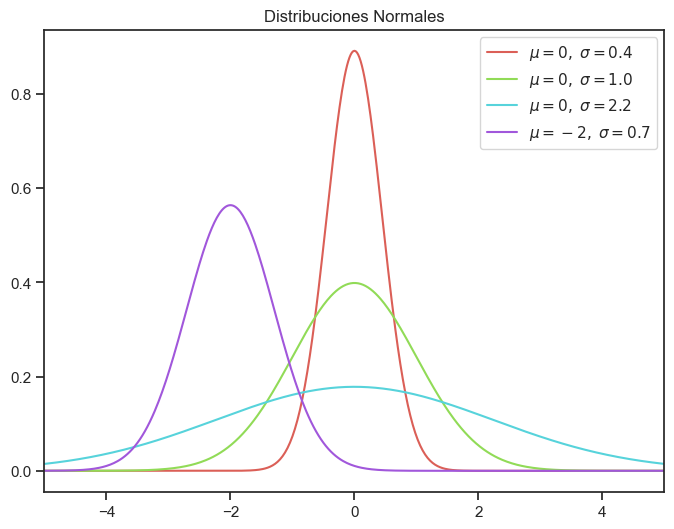

In [78]:
# Seleccione 3 valores medios y 3 SD

medias = [0, 0, 0, -2]
sd = [0.2, 1, 5, 0.5]
t = np.arange(-5, 5, 0.02)

# Trace los 3 archivos PDF, usando la paleta de colores "hls"

with sns.color_palette('hls', 4):
    for mu,sigma in zip(medias, np.sqrt(sd)):
        y = stats.norm.pdf(t, mu, sigma)
        plt.plot(t, y, label = f'$\mu={mu}, \; \t\sigma={sigma:3.1f}$')

# Dar formato al gráfico

plt.legend()
plt.xlim([-5,5])
plt.title('Distribuciones Normales')

plt.show()

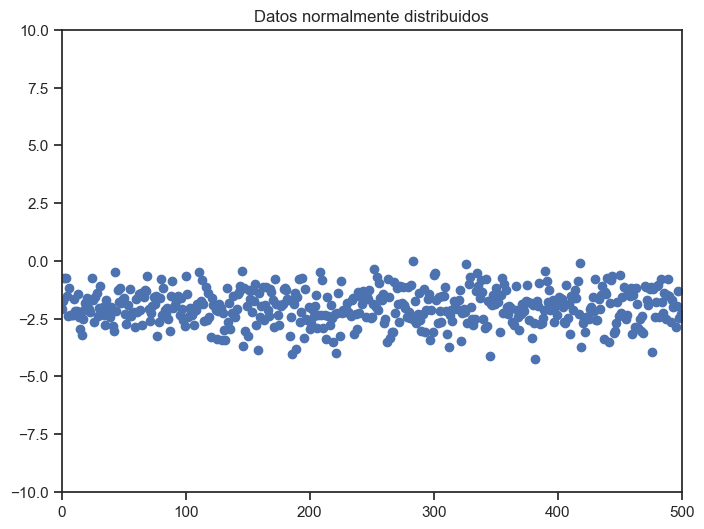

In [79]:
# Genera números aleatorios con una distribución normal

media = -2
sd = 0.7
n = 500
data = stats.norm.rvs(media, sd, size = n)

# Grafico los datos

plt.scatter(np.arange(len(data)), data)

# Dar formato al fráfico

plt.title('Datos normalmente distribuidos')
plt.xlim([0,500])
plt.ylim([-10,10])

plt.show()

Ej: Calcular el intervalo de 2 colas del PDF que contiene el 95% de los datos (curva morada).

In [80]:
mu = -2
sigma = 0.7
my_dist = stats.norm(mu,sigma)
alpha = 0.05

In [83]:
IC = my_dist.interval(1-alpha)

IC

(-3.371974789178038, -0.6280252108219622)

In [85]:
print(f'El IC al 95% es: [{IC[0]:3.2f} , {IC[1]:3.2f}]')

El IC al 95% es: [-3.37 , -0.63]


$\textbf{Suma de distribuciones normales:}$

La suma o resta de 2 distribuciones normales también se distribuye normalmente, es decir, si

$ X \in N(\mu_{X},\sigma_{X}^2) $

$ Y \in N(\mu_{Y},\sigma_{Y}^2) $

$ Z = X \pm Y $

entonces,

$ Z  \in N(\mu_{X} \pm \mu_{Y} , \sigma_{X}^2 + \sigma_{Y}^2) $

La varianza de la suma es la suma de las varianzas.

## 6.3.1 Ejemplos de distribuciones normales

$\textbf{Ejemplo 1:}$ Si el hombre promedio mide 175 cm de altura con una desviación estándar de 6 cm, ¿cuál es la probabilidad de que un hombre seleccionado al azar mida 183 cm de altura? 

In [8]:
media = 175  
desviacion_estandar = 6  
altura_deseada = 183

In [9]:
dn = stats.norm(media, desviacion_estandar)
dn

In [10]:
probabilidad = dn.pdf(altura_deseada)

print(f"La probabilidad de que un hombre seleccionado al azar mida 183 cm de altura es: {probabilidad:0.3}")

La probabilidad de que un hombre seleccionado al azar mida 183 cm de altura es: 0.0273


In [11]:
# Una forma alternativa podría ser 

p = dn.cdf(184) - dn.cdf(183)

print(f'La probabilidad de que un hombre elegido al azar mida 183 cm de altura es {p*100:.1f}%')

La probabilidad de que un hombre elegido al azar mida 183 cm de altura es 2.4%


$\textbf{Ejemplo 2:}$ Si se supone que las latas tienen una desviación estándar de 4 gramos, ¿cuál debe ser el peso promedio para garantizar que el 99% de todas las latas tengan un peso de al menos 250 gramos? 

In [15]:
mu_deseada = 250
desviacion_estandar = 4  
probabilidad_deseada = 0.99

In [16]:
dn = stats.norm(mu_deseada, desviacion_estandar)
dn

In [17]:
peso_promedio = dn.ppf(probabilidad_deseada)

print(f"El peso promedio necesario para garantizar que el 99% de las latas tengan un peso de al menos 250 gramos es: {peso_promedio:5.2f}")

El peso promedio necesario para garantizar que el 99% de las latas tengan un peso de al menos 250 gramos es: 259.31


In [18]:
# Alternativamente

dn = stats.norm()

below = dn.ppf(0.01)    # 1% puede estar por debajo de 250 g

production_weight = mu_deseada - desviacion_estandar * below

print(f'El peso de producción de las latas es {production_weight:5.1f}g.')

El peso de producción de las latas es 259.3g.


$\textbf{Ejemplo 3:}$ Si el hombre promedio mide 175 cm de altura con una desviación estándar de 6 cm, y la mujer promedio mide 168 cm de altura con una desviación estándar de 3 cm, ¿cuál es la probabilidad de que un hombre seleccionado al azar sea más bajo que una mujer seleccionada al azar? 

In [20]:
# Hombres

media_hombres = 175 

desviacion_estandar_hombres = 6 

In [21]:
# Mujeres

media_mujeres = 168  

desviacion_estandar_mujeres = 3  

In [22]:
std_diff = np.sqrt(desviacion_estandar_hombres**2 + desviacion_estandar_mujeres**2)

std_diff

6.708203932499369

In [23]:
dn = stats.norm(media_hombres - media_mujeres, std_diff)

dn

In [25]:
p = dn.cdf(0)

print(f'La probabilidad de que un hombre sea más pequeño que su pareja femenina es {p*100:.1f}%')

La probabilidad de que un hombre sea más pequeño que su pareja femenina es 14.8%


## 6.3.2 Teorema Central del Límite 

Establece que la media de un número suficientemente grande de variables aleatorias idénticamente distribuidas tendrá una distribución aproximadamente normal. 

La distribución muestral de la media tiende a la normalidad, independientemente de la distribución. 

Ej: Promediar más de 10 datos distribuidos uniformemente ya produce una distribución uniforme, casi gaussiana.

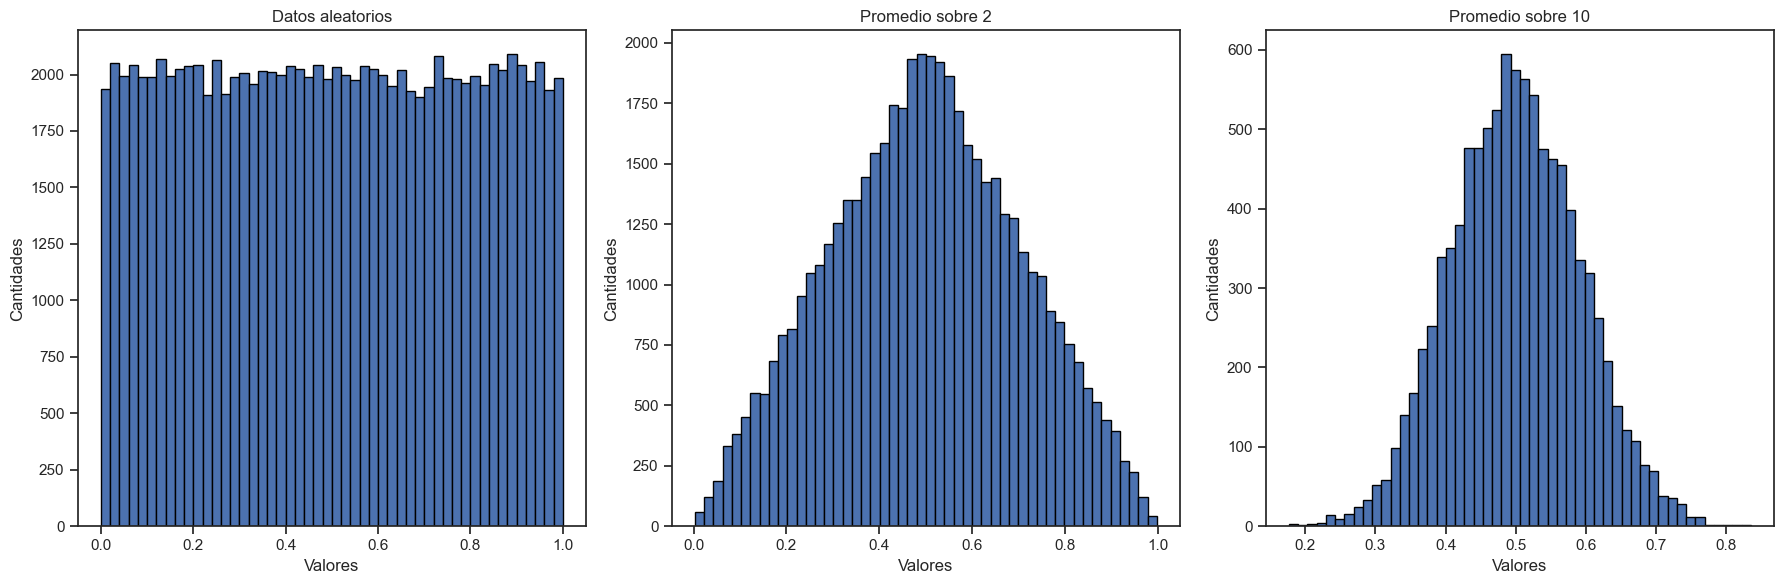

In [97]:
# Generar datos aleatorios a partir de una distribución uniforme

ndata = 100000
uniform_data = np.random.uniform(0, 1, ndata)

# Calcule los promedios sobre diferentes tamaños de grupos

average_2 = np.mean(uniform_data.reshape((ndata//2, 2)), axis = 1)
average_10 = np.mean(uniform_data.reshape((ndata//10, 10)), axis = 1)

# Crea los histogramas

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Histograma de datos aleatorios uniformemente distribuidos

axs[0].hist(uniform_data, bins = 50, edgecolor = 'black')
axs[0].set_title('Datos aleatorios')
axs[0].set_xlabel('Valores')
axs[0].set_ylabel('Cantidades')

# Histograma de promedio sobre 2 puntos de datos

axs[1].hist(average_2, bins = 50, edgecolor = 'black')
axs[1].set_title('Promedio sobre 2')
axs[1].set_xlabel('Valores')
axs[1].set_ylabel('Cantidades')

# Histograma de promedio sobre 10 puntos de datos

axs[2].hist(average_10, bins = 50, edgecolor = 'black')
axs[2].set_title('Promedio sobre 10')
axs[2].set_xlabel('Valores')
axs[2].set_ylabel('Cantidades')

plt.tight_layout()

plt.show()

## 6.3.3 Distribuciones y Tests de Hipétesis

Problema: El peso promedio de un recién nacido en los EE. UU. es de 3.5 kg, con una desviación estándar de 0.76 kg. Si queremos comprobar todos los niños que son significativamente diferentes del bebé típico, ¿qué debemos hacer con un niño que nace con un peso de 2.6 kg? 

Reformulamos el problema en forma de prueba de hipótesis: nuestra hipótesis es que el bebé proviene de la población de bebés sanos. ¿Podemos mantener la hipótesis, o el peso del bebé sugiere que debemos rechazar esa hipótesis? 

Para responder a esa pregunta, podemos proceder de la siguiente manera: 
- Hallar la distribución (congelada) que caracteriza a los bebés sanos: $\mu= 3.5$, $\sigma = 0.76$. 
- Calcular la CDF al valor de interés: $CDF(2.6 kg) = 0.118$. 
    - La probabilidad de que un bebé sano sea al menos 0.9 kg más liviano que el bebé promedio es del 11.8 %. 
    - Dado que tenemos una distribución normal, la probabilidad de que un bebé sano pese al menos 0.9 kg más que el bebé promedio también es del 11.8%. 
- Interpretación del resultado
    - Si el bebé está sano, la probabilidad de que su peso se desvíe al menos 0.9 kg de la media es 2*11.8% = 23.6 % 
    - Esto no es significativo, por lo que no tenemos pruebas suficientes para rechazar nuestra hipótesis, y nuestro bebé se considera saludable.

In [98]:
# Parámetros de la distribución normal

media = 3.5
desviacion_estandar = 0.76

# Peso del bebé

peso_bebe = 2.6

In [99]:
distribucion = stats.norm(media, desviacion_estandar)

distribucion

In [100]:
probabilidad = distribucion.cdf(2.6)

print(f'La probabilidad de que un bebé sano sea al menos 0.9 kg más liviano que el bebé promedio es del {probabilidad:0.3}.')

La probabilidad de que un bebé sano sea al menos 0.9 kg más liviano que el bebé promedio es del 0.118.


In [101]:
probabilidad_total = 2 * probabilidad

print(f'La probabilidad de que el peso del bebé sano se desvíe al menos 0.9 kg de la media es del {probabilidad_total:0.3}.')

La probabilidad de que el peso del bebé sano se desvíe al menos 0.9 kg de la media es del 0.236.


In [102]:
alpha = 0.05

# Interpretación del resultado

if probabilidad_total < alpha:
    print("El peso del bebé sugiere que debemos rechazar la hipótesis de que proviene de la población de bebés sanos.")
else:
    print("No tenemos pruebas suficientes para rechazar la hipótesis de que el bebé proviene de la población de bebés sanos.")

No tenemos pruebas suficientes para rechazar la hipótesis de que el bebé proviene de la población de bebés sanos.


La hipótesis de partida se denomina hipótesis nula. 

En nuestro ejemplo, significaría que asumimos que existe una diferencia nula entre la distribución de la que proviene el bebé y la población de bebés sanos.

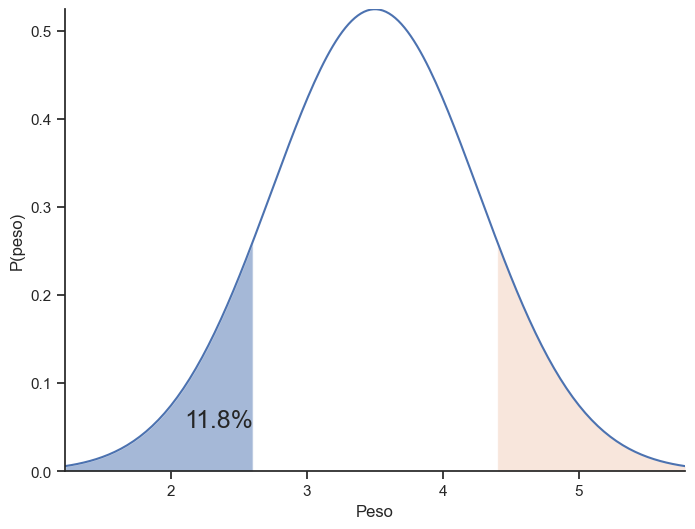

In [105]:
sns.set_context(context='notebook')
sns.set_style('ticks')

limits = (media - 3 * desviacion_estandar, media + 3 * desviacion_estandar)
num_pts = 200

x = np.linspace(limits[0], limits[1], num_pts)
y = distribucion.pdf(x)

x1 = np.linspace(limits[0], peso_bebe, num_pts)
y1 = distribucion.pdf(x1)

x2 = np.linspace(media + (media - peso_bebe), limits[1], num_pts)
y2 = distribucion.pdf(x2)

plt.plot(x, y)
plt.fill_between(x1, y1, alpha = 0.5)
plt.fill_between(x2, y2, alpha = 0.2)

plt.xlabel('Peso')
plt.ylabel('P(peso)')
plt.text(2.1, 0.05, '11.8%', fontsize = 18)

sns.despine()
plt.gca().margins(0, 0)

plt.show()

# 6.4 Distribuciones Continuas Derivadas de la Distribución Normal

Distribución t: 
- Distribución muestral de valores medios para muestras de una población normalmente distribuida. 
- Se usa para números de muestra pequeños, cuando se desconocen la media y la desviación estándar verdaderas. 
- Si se conoce el $\sigma$, la distribución de la media sigue una distribución normal. 

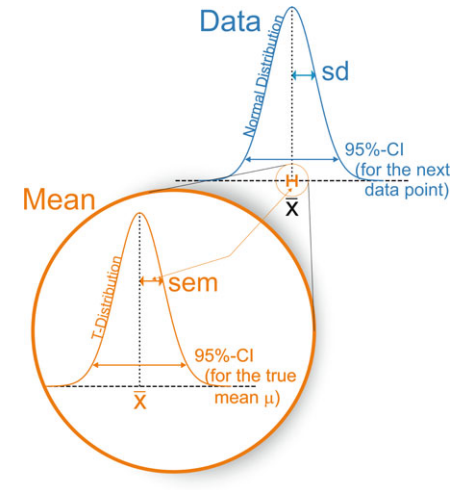

In [2]:
Image(filename='Imagenes/6.15.png')

Distribución de $\chi-cuadrado$: 
- Se usa para describir la variabilidad de los datos distribuidos normalmente. 

Distribución F: 
- Se usa para comparar las variabilidades de 2 conjuntos de datos normalmente distribuidos.

## 6.4.1 Distribución T

Usado en problemas de muestras pequeñas. 

En estas mediciones la verdadera varianza de la media es desconocida, por lo que, debe aproximarse por el error estándar muestral de la media.

La razón entre la media muestral y el error estándar tiene una distribución T de “Student”. 

Converge para valores más grandes hacia la distribución normal. 

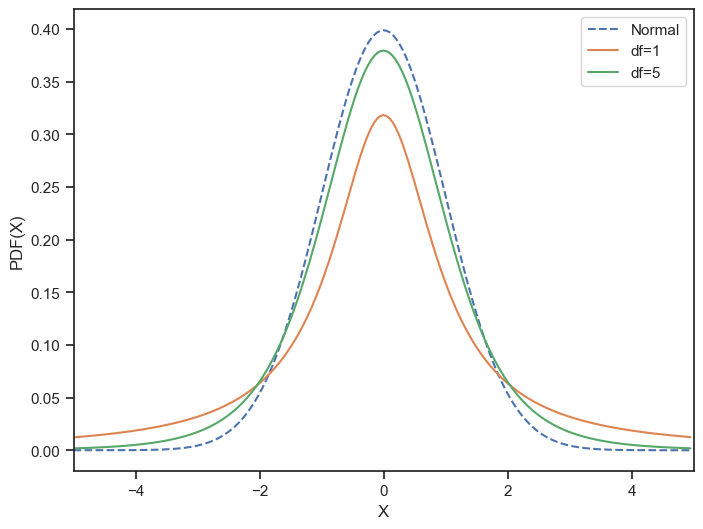

In [106]:
t = np.arange(-5, 5, 0.05)
t_vals = [1, 5]

normal = stats.norm.pdf(t)
t1 = stats.t.pdf(t, t_vals[0])
t5 = stats.t.pdf(t, t_vals[1])

plt.plot(t, normal, '--',  label = 'Normal')
plt.plot(t, t1, label = 'df=1')
plt.plot(t, t5, label = 'df=5')

plt.legend()
plt.xlim(-5, 5)
plt.xlabel('X')
plt.ylabel('PDF(X)')

plt.show()

Dado que en la mayoría de los casos se desconoce la media de la población y su varianza, normalmente se trabaja con la distribución t cuando se analizan datos muestrales.

Si $\bar{x}$ es la media muestral y $s$ la desviación estándar muestral, el estadístico resultante es

$ t = \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}} = \frac{\bar{x}-\mu}{SE} $

Dado que el valor medio ya se restó, la distribución t para la media sobre n datos tiene $n − 1$ grados de libertad (DOF). 

Es usada en el cálculo de IC para la media, es decir, el intervalo que contiene la verdadera media en un nivel de confianza dado $\alpha$:

$ IC = media \pm se * t_{df,\alpha} $ 

Ej: calcular los valores t para el IC del 95%, para n = 20. 

El extremo inferior del IC del 95% es el valor que es mayor que el 2.5% de la distribución, y el extremo superior del IC del 95% es el valor que es mayor que el 97.5% de la distribución. 

Estos valores se pueden obtener con la PPF o con la ISF.

In [125]:
x = np.random.randint(0, 10, 20)

x

array([0, 4, 2, 5, 6, 8, 8, 9, 8, 4, 4, 8, 9, 4, 1, 8, 1, 2, 1, 4])

In [126]:
n = len(x)

df = n - 1

alpha = 0.05

In [127]:
media = np.mean(x)

media

4.8

In [128]:
se = stats.sem(x)

se

0.6751218213657522

In [129]:
t = stats.t(df).isf(alpha/2)

t

2.0930240544082634

In [130]:
IC_inf = media - se * t

IC_inf

3.386953788225562

In [131]:
IC_sup = media + se * t

IC_sup

6.213046211774438

In [132]:
print(f'El IC al 95% es: [{IC_inf:1.3f} , {IC_sup:1.3f}]')

El IC al 95% es: [3.387 , 6.213]


In [133]:
dt = stats.t(df, media, se)

dt

In [136]:
ic = dt.interval(1 - alpha)

ic

(3.3869537882255623, 6.213046211774437)

A modo de comparación, también calculo el valor correspondiente de la distribución normal.

In [115]:
z = stats.norm.isf(alpha/2)

z

1.9599639845400545

In [116]:
IC_inf_norm = media - se * z

IC_inf_norm

3.4999069721341414

In [117]:
IC_sup_norm = media + se * z

IC_sup_norm

6.100093027865858

In [118]:
print(f'El IC al 95% con una distribución normal es: [{IC_inf_norm:1.3f} , {IC_sup_norm:1.3f}]')

El IC al 95% con una distribución normal es: [3.500 , 6.100]


El IC del 95 % para la media se puede obtener:

In [119]:
IC = stats.t.interval(1-alpha, df, loc = media, scale = se)

print(f'El IC al 95% es: [{IC[0]:1.3f} , {IC[1]:1.3f}]')

El IC al 95% es: [3.412 , 6.188]


In [120]:
# Datos

data = [5, 7, 6, 8, 9, 4, 7, 6, 5, 8]

# Nivel de confianza (1 - alpha)

alpha = 0.05

# Grados de libertad

df = len(data) - 1

# Cálculo del intervalo de confianza

ci = stats.t.interval(1 - alpha, df, loc = np.mean(data), scale = stats.sem(data))

print("Intervalo de confianza:", ci)

Intervalo de confianza: (5.368921418629505, 7.631078581370495)


Dado que la distribución t tiene colas más largas que la distribución normal, se ve mucho menos afectada por los casos extremos.

In [2]:
# Generamos los datos

np.random.seed(12345)

ndata = 100

data = stats.norm.rvs(size = (ndata,))

data2 = stats.norm.rvs(5, size = (20,))

dataWOutlier = np.hstack((data, data2))

In [3]:
# Calcular los ajustes

fit_gauss_wo = stats.norm.fit(data)
fit_gauss_w = stats.norm.fit(dataWOutlier)

fit_t_wo = stats.t.fit(data)
fit_t_w = stats.t.fit(dataWOutlier)

In [4]:
# Mostrar los resultados de ajuste

print(f'Distribución Gaussiana: {fit_gauss_wo} -> {fit_gauss_w}')
print(f'Distribución t: {fit_t_wo[1:]} -> {fit_t_w[1:]}')

# No se muestra el ajuste de "df", ya que es bastante inestable para grandes df

Distribución Gaussiana: (0.033614388208863935, 1.0350846417161685) -> (0.8311014668355969, 2.0518828738055697)
Distribución t: (0.03375864345771347, 0.9993012886935959) -> (0.23298708282199418, 1.0771011815413085)


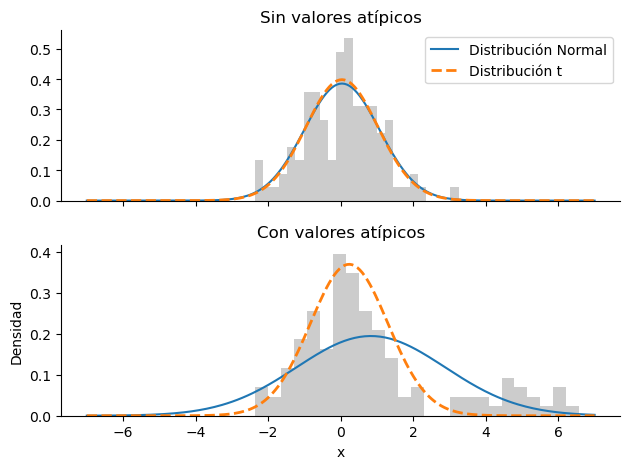

In [5]:
# Graficar las curvas ajustadas, a ambos conjuntos de datos

fitted_x = np.linspace(-7, 7, 200)       # valores x para curvas ajustadas

# Curvas ajustadas al conjunto de datos original

fitted_gauss_wo = stats.norm.pdf(fitted_x, loc = fit_gauss_wo[0], scale = fit_gauss_wo[1])
fitted_t_wo = stats.t.pdf(fitted_x, df = ndata-1, loc = fit_t_wo[1], scale = fit_t_wo[2])

# Curvas ajustadas al conjunto de datos con valores atípicos

fitted_gauss_w = stats.norm.pdf(fitted_x, loc = fit_gauss_w[0], scale = fit_gauss_w[1])
fitted_t_w = stats.t.pdf(fitted_x, df = ndata-1, loc = fit_t_w[1], scale = fit_t_w[2])

# Mostrar los datos

fig, axs = plt.subplots(2, 1, sharex = True)

axs[0].hist(data, density = True, bins = 25, color = '#CCCCCC')
axs[0].plot(fitted_x, fitted_gauss_wo, label = 'Distribución Normal')
axs[0].plot(fitted_x, fitted_t_wo, ls = '--', lw = 2, label = 'Distribución t')
axs[0].set_title('Sin valores atípicos')
axs[0].legend()

axs[1].hist(dataWOutlier, density = True, bins = 25, color = '#CCCCCC')
axs[1].plot(fitted_x, fitted_gauss_w, label = 'Distribución Normal')
axs[1].plot(fitted_x, fitted_t_w, ls = '--', lw = 2, label = 'Distribución t')
axs[1].set_title('Con valores atípicos')

# Eliminar el eje derecho y superior

for ax in axs:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.xlabel('x')
plt.ylabel('Densidad')

plt.tight_layout()

plt.show()

## 6.4.2 Distribución Chi-Cuadrado

Está relacionada con la distribución normal de una manera simple: 
- Si una variable aleatoria $X$ tiene una distribución normal ($X \in N(0, 1)$), entonces $X^2$ tiene una distribución chi-cuadrado, con un grado de libertad ($X^2 \in \chi_1^2$). 
- La suma de cuadrados de $n$ variables aleatorias normales estándar e independientes tiene una distribución chi-cuadrado con $n$ grados de libertad:

$\sum\limits_{i=1}^{n} X_i^2 \in \chi_n^2$

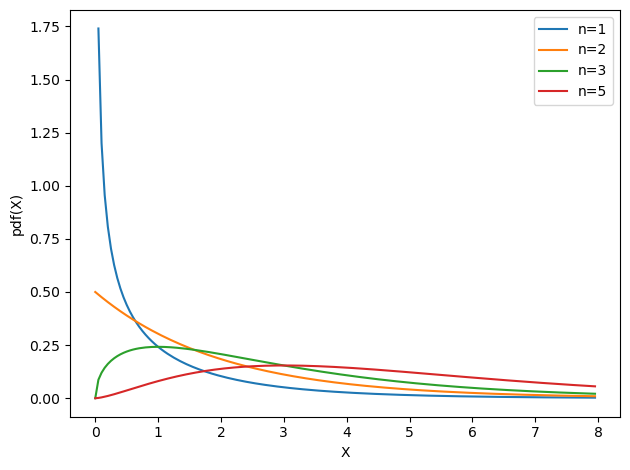

In [6]:
t = np.arange(0, 8, 0.05)
Chi2Vals = [1, 2, 3, 5]

for chi2 in Chi2Vals:
    plt.plot(t, stats.chi2.pdf(t, chi2), label='n={0}'.format(chi2))

plt.legend()

# plt.xlim(0, 8)
plt.xlabel('X')
plt.ylabel('pdf(X)')
plt.tight_layout()

plt.show()

$\textbf{Ejemplo de aplicación:}$ 

Se ordena a un fabricante de pastillas que entregue pastillas con una desviación estándar de $\sigma$ = 0.05. 

Del siguiente lote de píldoras, $n$ = 13 muestras aleatorias tienen un peso de 

3,04, 2,94, 3,01, 3,00, 2,94, 2,91, 3,02, 3,04, 3,09, 2,95, 2,99, 3,10, 3,02 g. 

Pregunta: ¿Es la desviación estándar mayor de lo permitido?

Respuesta: Dado que la distribución de chi-cuadrado describe la distribución de los cuadrados sumados de variables aleatorias de una distribución normal estándar, tenemos que normalizar nuestros datos antes de calcular el valor CDF correspondiente:

$ SF_{\chi_{n-1}^2} = 1 - CDF_{\chi_{n-1}^2} (\sum (\frac{x-\bar{x}}{\sigma})^2) = 0.1929$.

Interpretación: si el lote de pastillas es de una distribución con una desviación estándar de $\sigma$ = 0.05, la probabilidad de obtener un valor de chi-cuadrado igual o mayor que el observado es de alrededor del 19%, por lo que no es atípico. En otras palabras, el lote coincide con la desviación estándar esperada. 

Nota: El número del DOF es n − 1, porque solo nos interesa la forma de la distribución, y el valor medio de los $n$ datos se resta de todos los puntos de datos.

In [7]:
data = [3.04, 2.94, 3.01, 3.00, 2.94, 2.91, 3.02,
        3.04, 3.09, 2.95, 2.99, 3.10, 3.02]

sigma = 0.05

df = len(data) - 1

In [8]:
chi2Dist = stats.chi2(df)

chi2Dist

In [9]:
statistic = sum(((data - np.mean(data))/sigma)**2)

statistic

15.963076923076907

In [10]:
chi2Dist.sf(statistic)

0.19293306654285156

In [11]:
alpha = 0.05

if chi2Dist.sf(statistic) < alpha:
    print('El lote no coincide con la desviación estándar esperada.')
else:
    print('El lote coincide con la desviación estándar esperada.')

El lote coincide con la desviación estándar esperada.


## 6.4.3 Distribución F

Lleva el nombre de Sir Ronald Fisher, quien desarrolló la distribución F para usarla en la determinación de valores críticos en ANOVA ("Análisis de Varianza"). 

Si queremos investigar si 2 grupos tienen la misma varianza, tenemos que calcular la razón de las varianzas muestrales:

$ F = \frac{var_x}{var_y} $

donde $var_x$ y $var_y$ son la varianza de la primera y segunda muestra, respectivamente. 

La distribución de esta estadística es la distribución F.

$\textbf{Ejemplos de aplicación:}$ 

ANOVA
- Se comparan 3 o más grupos. 
- La variación entre los grupos se compara con la variación dentro de los grupos.
- Los valores de corte para una distribución F generalmente se encuentran utilizando 3 variables:
    - Grados de libertad del numerador de ANOVA 
    - Grados de libertad del denominador de ANOVA 
    - Nivel de significancia. 

Compara el tamaño de la varianza entre 2 muestras diferentes. Esto se hace dividiendo la varianza mayor por la varianza menor 

$ F = \frac{var_x}{var_y} $.

La fórmula para el estadístico F resultante es:

$ F(r_1,r_2) = \frac{\frac{\chi_{r_1}^2}{r_1}}{\frac{\chi_{r_2}^2}{r_2}} $

donde $\chi_{r_1}^2$ y $\chi_{r_2}^2$ son las estadísticas de chi-cuadrado de la muestra 1 y 2, respectivamente, y $r_1$ y $r_2$ son sus grados de libertad, $r_i = n_i − 1$. 

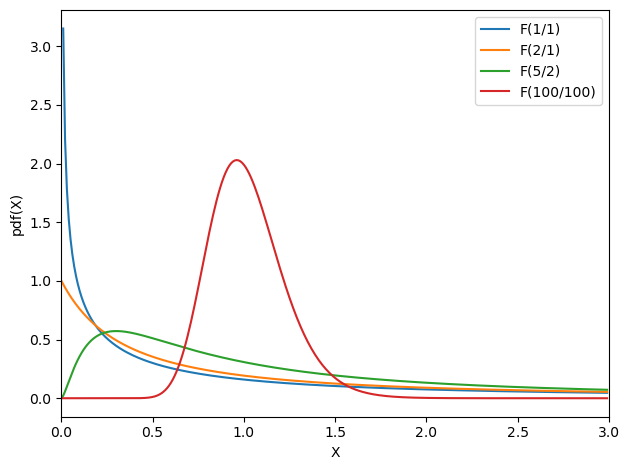

In [12]:
t = np.arange(0, 3, 0.01)
d1s = [1, 2, 5, 100]
d2s = [1, 1, 2, 100]

for (d1,d2) in zip(d1s,d2s):
    plt.plot(t, stats.f.pdf(t, d1, d2), label = 'F({0}/{1})'.format(d1,d2))

plt.xlim(0, 3)
plt.xlabel('X')
plt.ylabel('pdf(X)')
plt.tight_layout()
plt.legend()

plt.show()

También se usa la distribución F en la comparación de variaciones de medición (o producción). 

Ej: una empresa produce implantes de cadera y cambia de un sistema antiguo a un sistema nuevo. 

Para el proceso antiguo y nuevo, obtenemos muestras con los siguientes diámetros de cabeza de fémur (en mm):

Método viejo: [29.7, 29.4, 30.1, 28.6, 28.8, 30.2, 28.7, 29. ]

Método nuevo: [30.7, 30.3, 30.3, 30.3, 30.7, 29.9, 29.9, 29.9, 30.3, 30.3, 29.7, 30.3]

Para comparar si la precisión del nuevo sistema es tan buena como la del antiguo, usamos

$ F = \frac{var_x}{var_y} $

para comparar las 2 varianzas.

Un valor de
- F = 1: ambas precisiones son equivalentes.
- F < 1: el nuevo método es más preciso.
- F > 1: el viejo método es más preciso. 

Si el valor F está dentro del intervalo de confianza del 95%, significaría que los 2 métodos no son significativamente diferentes. 

La estadística F es F = 0.244 y tiene $n − 1$ y $m − 1$ grados de libertad, donde $n$ y $m$ son el número de grabaciones con cada método. 

El estadístico F está en la cola de la distribución (p = 0.019), por lo que rechazamos la hipótesis de que los 2 métodos tienen la misma precisión. 

In [13]:
viejo = [29.7, 29.4, 30.1, 28.6, 28.8, 30.2, 28.7, 29.]

nuevo = [30.7, 30.3, 30.3, 30.3, 30.7, 29.9, 29.9, 29.9, 30.3, 30.3, 29.7, 30.3]

In [14]:
f_val = np.var(nuevo,ddof = 1) / np.var(viejo,ddof = 1) 

f_val

0.24393467384121667

In [15]:
f_dist = stats.f(len(nuevo)-1, len(viejo)-1)

f_dist

In [16]:
p = f_dist.cdf(f_val)

p

0.018665169931411433

In [17]:
if (0.025 < p <0.975):
    print('Los 2 métodos tienen la misma precisión.')
else:
    print('Los 2 métodos no tienen la misma precisión.')

Los 2 métodos no tienen la misma precisión.


Existe una diferencia importante entre exactitud y precisión: 

Para la producción
- Exactitud: es la diferencia entre las partes previstas y las producidas.
- Precisión: es la variabilidad entre las partes producidas. 

Para las medidas
- Exactitud: da la desviación entre el valor real y el medido.
- Precisión: está determinada por la varianza de las medidas. 

La exactitud se puede cambiar ajustando los controles del sistema.

La precisión depende de la variabilidad en el proceso de producción o medición y, por lo tanto, es mucho más difícil de controlar. 

En el área de control de calidad, la calidad es inversamente proporcional a la precisión.

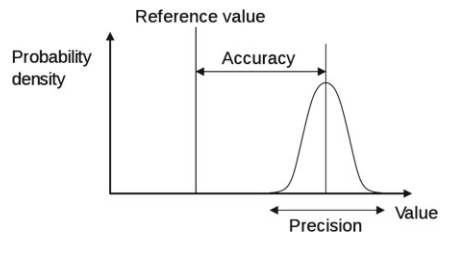

In [53]:
Image(filename='Imagenes/6.20.png')

# 6.5 Otras distribuciones continuas

No están directamente relacionadas con la distribución normal.

Distribución lognormal: 
- Una distribución normal, representada en una escala exponencial. 
- Se usa para convertir una distribución fuertemente sesgada en una distribución normal. 

Distribución de Weibull: 
- Se usa para datos de confiabilidad o supervivencia. 

Distribución exponencial:
- Curvas exponenciales. 

Distribución uniforme:
- Cuando todo es igualmente probable.

## 6.5.1 Distribución Lognormal

Las distribuciones normales son las más fáciles de trabajar. 

Cuando hay un conjunto de datos con una distribución sesgada positivamente, podemos transformarla en una distribución normal simétrica tomando logaritmos. 

Tomar registros de datos con una distribución sesgada a menudo dará una distribución cercana a la normal.

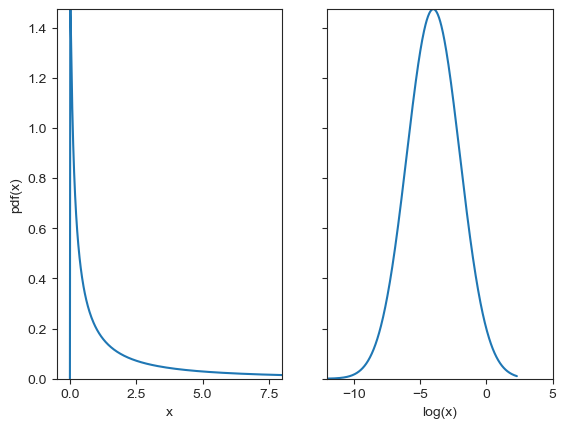

In [4]:
# Datos

x = np.logspace(-9,1,1001)+1e-9
lnd = stats.lognorm(2)
y = lnd.pdf(x)

# Generar 2 gráficos

sns.set_style('ticks')
fig, axs = plt.subplots(1,2, sharey=True)
sns.set_context('notebook')

# Gráfico izquierdo: escala lineal en el eje x

axs[0].plot(x,y)
axs[0].set_xlim(-0.5,8)
axs[0].set_xlabel('x')
axs[0].set_ylabel('pdf(x)')
axs[0].margins(0,0)

# Gráfico derecho: escala logarítmica en el eje x

axs[1].plot(np.log(x), y)
axs[1].set_xlim(-12,5)
axs[1].set_xlabel('log(x)')
axs[1].margins(0,0)

plt.show()

## 6.5.2 Distribución Weibull

Es la distribución más utilizada para modelar datos de confiabilidad o datos de "supervivencia".

Tiene 2 parámetros, que le permiten manejar tasas de falla crecientes, decrecientes o constantes. 

Su PDF se define como

$ p(x) = \begin{cases} \frac{k}{\lambda} \left(\frac{x}{\lambda}\right)^{k-1} e^{-\left(\frac{x}{\lambda}\right)^k} & \text{si } x \geq 0 \\[8pt] 0 & \text{si } x < 0 \end{cases}
 $
 
donde $k > 0$ es el parámetro de forma y $\lambda > 0$ es el parámetro de escala de la distribución. (Es uno de los raros casos en los que usamos un parámetro de forma diferente de la asimetría y la curtosis). 

Su función de distribución acumulativa complementaria es una función exponencial estirada. 

Si la cantidad x es un “tiempo hasta la falla”, la distribución de Weibull da una distribución para la cual la tasa de falla es proporcional a una potencia del tiempo. El parámetro de forma, $k$, es esa potencia más uno, por lo que este parámetro se puede interpretar directamente de la siguiente manera: 
- Un valor de $k < 1$
    - Indica que la tasa de fallas disminuye con el tiempo.
    - Esto sucede si hay una “mortalidad infantil” significativa, o si los artículos defectuosos fallan temprano y la tasa de fallas disminuye con el tiempo a medida que los artículos defectuosos se eliminan de la población. 
- Un valor de $k = 1$
    - Indica que la tasa de fallas es constante en el tiempo. 
    - Esto podría sugerir que eventos externos aleatorios están causando mortalidad o fallas. 
- Un valor de $k > 1$ 
    - Indica que la tasa de fallos aumenta con el tiempo.
    - Esto sucede si hay un proceso de "envejecimiento" o partes que tienen más probabilidades de fallar con el paso del tiempo. 
    - Ej: los productos con una debilidad incorporada que fallan poco después de que vence la garantía. 

En el campo de la ciencia de los materiales, el parámetro de forma k de una distribución de fuerzas se conoce como módulo de Weibull.

C:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2267: RuntimeWarning: divide by zero encountered in power
  return c*pow(x, c-1)*np.exp(-pow(x, c))


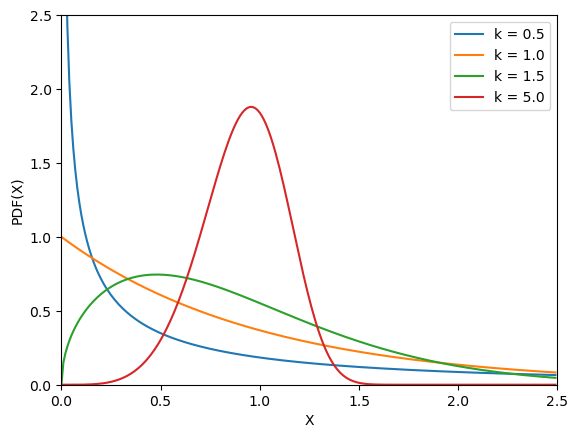

In [18]:
t = np.arange(0, 2.5, 0.01)
ks = [0.5, 1, 1.5, 5]

for k in ks:
    wd = stats.weibull_min(k)
    plt.plot(t, wd.pdf(t), label = 'k = {0:.1f}'.format(k))

plt.xlim(0, 2.5)
plt.ylim(0, 2.5)
plt.xlabel('X')
plt.ylabel('PDF(X)')
plt.legend()

plt.show()

## 6.5.3 Distribución exponencial

Para una variable estocástica $X$ con distribución exponencial, la PDF es:

$ p(x) = \begin{cases} \lambda e^{-\lambda x} & \text{si } x \geq 0 \\[8pt] 0 & \text{si } x < 0 \end{cases}
 $

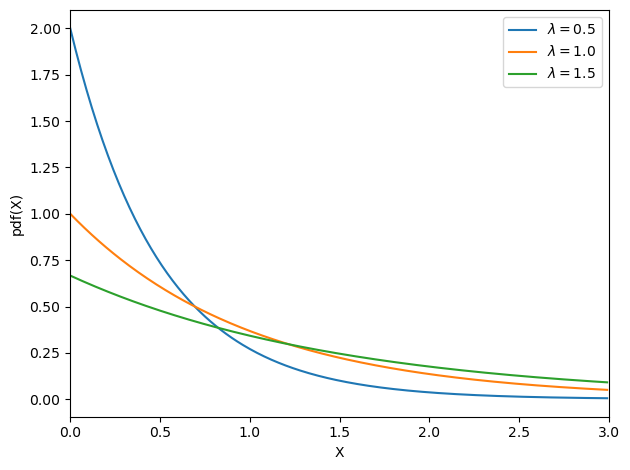

In [19]:
t = np.arange(0, 3, 0.01)
lambdas = [0.5, 1, 1.5]

for par in lambdas:
    plt.plot(t, stats.expon.pdf(t, 0, par), label = '$\lambda={0:3.1f}$'.format(par))

plt.xlim(0, 3)
plt.xlabel('X')
plt.ylabel('pdf(X)')
plt.tight_layout()
plt.legend()

plt.show()

## 6.5.4 Distribución Uniforme

Una probabilidad par para todos los valores de los datos. 

No es muy común para datos reales.

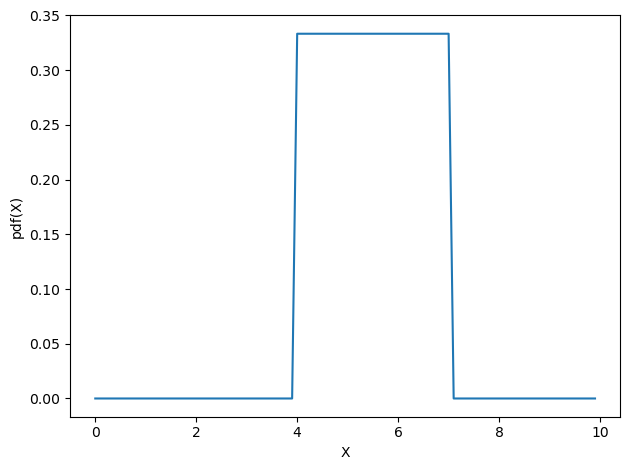

In [20]:
x = np.arange(0, 10, 0.1)
a, b = 4, 3

ud = stats.uniform(a, b)
plt.plot(x, ud.pdf(x))

plt.xlabel('X')
plt.ylabel('pdf(X)')
plt.tight_layout()

plt.show()

# 6.6 Intervalos de confianza de parámetros estadísticos seleccionados

Dependiendo del objetivo del "control estadístico de procesos (SPC)", los valores observados para diferentes parámetros se comparan con sus respectivos intervalos de confianza. 

Uno de estos parámetros es el valor medio de los datos normalmente distribuidos. 

La distribución del valor medio se caracteriza por la distribución t, y su escala está determinada por el error estándar de la media 

$ ci = media \pm se * t_{df,\alpha} $. 

Otros parámetros 

|Distribución|Parámetros   |
|------------|-------------|
|Normal      |$\mu, \sigma$|
|Binomial    |$n, p$       |
|Poisson     |$\lambda$    |

La función ISP_confidence_interval.py proporciona todos los valores que solían estar impresos en largas tablas al final de los libros de estadística clásicos. 

Para cada uno de estos parámetros, se puede determinar el intervalo de confianza de 2 colas [predeterminado], superior e inferior, y el nivel de significación predeterminado se establece en $\alpha$ = 0.05. 

In [21]:
import ISP_confidence_intervals as ci

In [22]:
# Establecer datos y parámetros

data = [89, 104.1, 92.3, 106.2, 96.3, 107.8, 102.5]
n_obs = 1  # para
n_tot = 20 # Binomial
n_expected = 12 # para Poisson

In [23]:
# Calculo los IC

ci_mean = ci.mean(data, ci_type = 'lower')

ci_mean

array([94.4140034])

In [24]:
ci_s = ci.sigma(data, ci_type = 'upper')
ci_s

array([13.89746618])

In [25]:
ci_bin = ci.binomial(n_obs, n_tot, ci_type = 'two-sided')

ci_bin

array([0.00126509, 0.24873276])

In [26]:
ci_poisson = ci.poisson(n_expected, alpha = 0.05)

print(f'IC-límite(s) para la media de Poisson:\n{ci_poisson}')

IC-límite(s) para la media de Poisson:
[ 6.20057511 20.96158505]


El nivel de significancia $\alpha$ se establece típicamente en 0.05 = 5%:

- “¿Son los datos diferentes de cierto valor?”: intervalo de confianza bilateral, que corresponde a

$ CI = \textit{fronzen_dist.ppf}([\frac{\alpha}{2},1 - \frac{\alpha}{2}]) $

- “¿Son los datos más grandes que un límite permitido?”: Límite inferior de confianza

$ CI_{lower} = \textit{fronzen_dist.ppf}(\alpha)$

$ CI = [CI_{lower},\infty] $

- "¿Son los datos más pequeños que un límite permitido?": Límite de confianza superior

$ CI_{upper} = \textit{fronzen_dist.ppf}(1-\alpha)$

$ CI = [-\infty,CI_{upper}] $


# 6.7 Ejercicios

1. Desviación estándar de la muestra 

Cree una matriz numérica que contenga los datos 1, 2, 3,..., 10. Calcule la media y la desviación estándar de la muestra(!).

In [27]:
x = np.arange(1,11)

x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [28]:
media = np.mean(x)

print(f'La media de la matriz es {media}.')

La media de la matriz es 5.5.


In [29]:
desviacion_estandar = np.std(x, ddof=1)

print(f'La desviación estándar de la matriz es {desviacion_estandar}.')

La desviación estándar de la matriz es 3.0276503540974917.


2. Distribución normal 
- Generar y trazar la función de densidad de probabilidad (PDF) de una distribución normal, con una media de 5 y una desviación estándar de 3. 
- Generar 1000 datos aleatorios de esta distribución. 
- Calcular el error estándar de la media de estos datos. 
- Trace el histograma de estos datos. 
- A partir del PDF, calcule el intervalo que contiene el 95% de estos datos. 
- Su médico le dice que puede usar implantes de cadera para la cirugía, incluso si son 1 mm más grandes o más pequeños que el tamaño especificado. Y su director financiero le dice que puede descartar 1 de cada 1000 implantes de cadera y aun así obtener ganancias. ¿Cuál es la desviación estándar requerida para que el productor de los implantes de cadera satisfaga simultáneamente ambos requisitos? 

In [31]:
# Datos de la distribución normal

media = 5

desviacion_estandar = 3

In [32]:
# Genere una distribución normal con una media de 5 y una desviación estándar de 3

normal_dist = stats.norm(5,3)

normal_dist

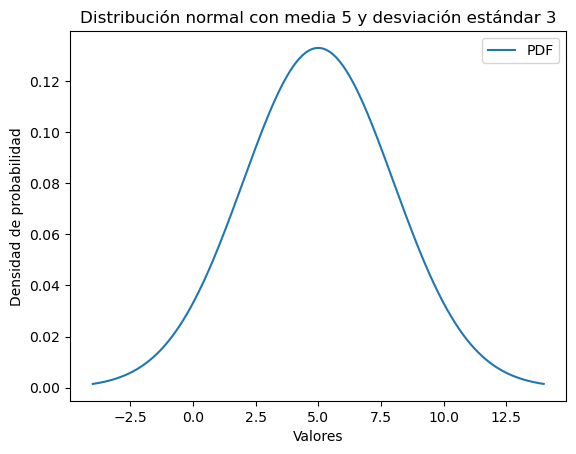

In [33]:
# Generar valores de x desde la media menos 3 desviaciones estándar
# hasta la media más 3 desviaciones estándar

x = np.linspace(media - 3 * desviacion_estandar, media + 3 * desviacion_estandar, 1000)

# Calcular la PDF 

pdf = normal_dist.pdf(x)

# Graficar la PDF

plt.plot(x, pdf, label = 'PDF')

plt.xlabel('Valores')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución normal con media 5 y desviación estándar 3')

plt.legend()

plt.show()

In [34]:
# Generar 1000 datos de esta distribución

data = normal_dist.rvs(1000)

data

array([-1.75839174e+00,  1.49950335e+00,  6.06082131e+00,  7.10633051e+00,
        4.17629239e+00,  4.58257344e+00,  5.32297166e+00,  3.18036462e+00,
        3.74880678e+00,  4.94897889e+00,  1.32756415e+00, -4.02519740e-01,
        9.90420861e+00,  7.96702491e+00,  6.37382043e+00,  6.66546323e+00,
        8.92015917e+00,  3.67833929e+00,  4.09594916e+00,  6.49637447e+00,
        2.52802688e+00,  8.96169753e+00,  6.52389436e+00,  3.03968697e+00,
        5.56093854e+00,  3.82482425e+00,  4.18312107e+00,  4.94857569e+00,
        7.04096225e+00,  6.90653707e+00,  2.72847049e+00,  7.15425750e+00,
        4.08718077e+00, -3.33707373e-02,  6.28095826e+00,  3.08780463e-01,
        3.89753744e+00,  8.13773760e+00,  8.65986309e+00,  4.25690265e+00,
        3.75130360e+00,  4.64975899e+00, -5.34362848e-01,  1.12061236e+01,
        2.66909758e+00,  9.32050061e+00,  4.66832792e+00,  8.68216098e+00,
        1.07623528e+01,  7.23929911e+00,  1.16739788e+01,  2.96179877e+00,
        7.18210634e+00,  

In [35]:
# Error estándar

se = np.std(data, ddof=1)/np.sqrt(1000)

print(f'El error estándar de la media de los datos es {se:0.3f}.')

El error estándar de la media de los datos es 0.092.


In [36]:
# Alternativamente

stats.sem(data)

0.09218722725437342

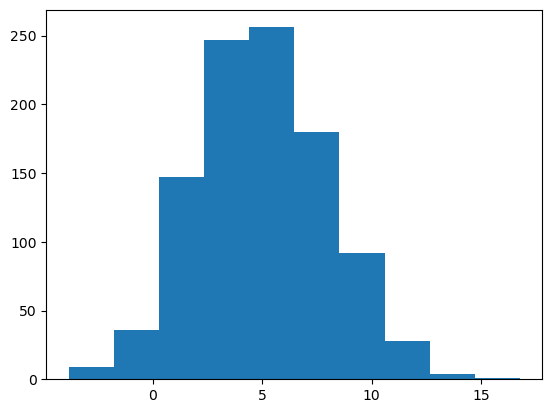

In [37]:
# Histograma

plt.hist(data)

plt.show()

In [38]:
# IC 95% 

IC_inf = normal_dist.ppf(0.025)

IC_sup = normal_dist.ppf(0.975)

print(f'Intervalo de confianza del 95%: [{IC_inf:4.2f} , {IC_sup:4.2f}]')

Intervalo de confianza del 95%: [-0.88 , 10.88]


In [40]:
# Alternativamente

alpha = 0.05

normal_dist.interval(1 - alpha)

(-0.8798919536201621, 10.879891953620163)

In [41]:
# SD para implantes de cadera

descarte = 1/1000

nd = stats.norm()

numSDs = nd.isf(descarte/2)  

tolerancia = 1/numSDs

print(f'La SD requerida para cumplir con ambos requisitos = {tolerancia:6.4f} mm')

La SD requerida para cumplir con ambos requisitos = 0.3039 mm


3. Distribuciones continuas 

1) Distribución T: Midiendo el peso de tus compañeros, has obtenido los siguientes pesos: 52, 70, 65, 85, 62, 83, 59 kg. Calcule la media correspondiente y el intervalo de confianza del 99% para la media. Nota: con n valores, tiene n-1 DOF para la distribución t.

2) Distribución Chi-cuadrado: Cree 3 conjuntos de datos normalmente distribuidos (media = 0, sd = 1), con 1000 muestras cada uno. Luego, cuadrelos, súmelos (para que tenga 1000 puntos de datos) y cree un histograma con 100 contenedores. Esto debería ser similar a la curva correspondiente para la distribución de Chi-cuadrado, con 3 DOF (es decir, debería bajar a la izquierda). 

3) Distribución F: En una línea de producción de implantes de cadera, se reemplaza una máquina vieja por un modelo más nuevo. Antes del reemplazo, una selección aleatoria de implantes de cadera tiene cabezas con un diámetro de [32,0, 32,5, 31,5, 32,1, 31,8] mm. Otra selección tomada la instalación del nuevo modelo produce tamaños de cabeza de [33,2, 33,3, 33,8, 33,5, 34,0] mm. ¿Es igual la precisión de las dos máquinas? Nota: calcule el valor F correspondiente y compruebe si la CDF para la distribución F correspondiente es < 0,025. 

4) Distribución Uniforme: Defina una distribución uniforme, con un rango [0, 1], y genere 1000 variables aleatorias de esa distribución. Traza estos datos como un diagrama de dispersión. ¿Cuál es el IC del 95% de esta distribución? ¿Qué es el 99.9%-IC? ¡Intenta resolver esto sin calculadora!

$\textbf{1)}$

In [42]:
# Datos

x = [52, 70, 65, 85, 62, 83, 59]

In [43]:
# Parámetros

num = len(x)

dof = num - 1

mean = np.mean(x)

alpha = 0.01

In [44]:
td = stats.t(dof, loc = mean, scale = stats.sem(x))

td

In [45]:
ci = td.interval(1-alpha)
ci

(50.83794309698711, 85.16205690301288)

In [46]:
# Alternativamente

ci = td.ppf([alpha/2, 1-alpha/2])

ci

array([50.8379431, 85.1620569])

In [48]:
print(f'Peso medio = {mean:3.1f} kg\nIC al 99% = [{ci[0]:3.1f}, {ci[1]:3.1f}] kg')

Peso medio = 68.0 kg
IC al 99% = [50.8, 85.2] kg


$\textbf{2)}$

In [49]:
# Definimos la distribución normal

nd = stats.norm()

In [50]:
# Genere 3 conjuntos de variantes aleatorias de esta distribución

num_data = 1000

data = np.random.randn(num_data, 3)

In [51]:
data

array([[-0.3082717 ,  0.31763529,  2.45884191],
       [-0.87877703,  0.85068445,  0.20585531],
       [ 0.30300457, -0.2259589 ,  1.90545499],
       ...,
       [-0.95065686,  0.61953582, -0.19789685],
       [-1.52332369, -0.80054621, -0.39970637],
       [-1.05235059,  0.22564751,  1.05494602]])

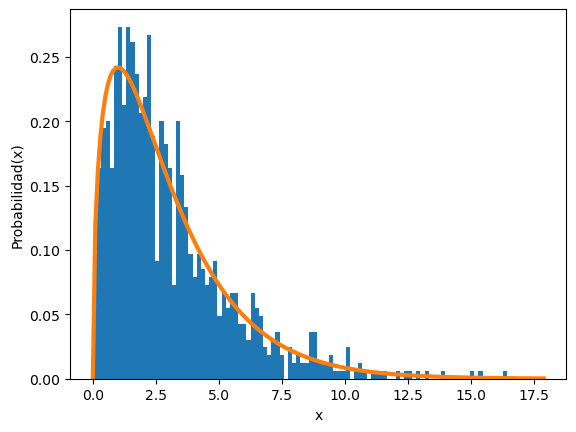

In [52]:
# Mostrar histograma de la suma de los cuadrados de estos datos aleatorios

plt.hist(np.sum(data**2, axis = 1), bins = 100, density = True)

# Superpóngalo con la distribución exacta de chi-cuadrado

x = np.arange(0, 18, 0.1)
chi2 = stats.chi2(df = 3)
pdf = chi2.pdf(x)

plt.plot(x, pdf, lw = 3)

plt.xlabel('x')
plt.ylabel('Probabilidad(x)')

plt.show()

$\textbf{3)}$

In [53]:
# Datos

femurs_1 = [32.0, 32.5, 31.5, 32.1, 31.8]

femurs_2 = [33.2, 33.3, 33.8, 33.5, 34.0]

In [54]:
# Cálculos

fval = np.var(femurs_1, ddof=1) / np.var(femurs_2, ddof=1)

fd = stats.distributions.f(len(femurs_1),len(femurs_2))

pval = fd.cdf(fval)

In [55]:
# Resultados

print(f'El valor p de la distribución F = {pval:5.3f}.')

if 0.025 < pval < 0.975:
    print('Las precisiones de las 2 máquinas son iguales.')
else:
    print('Las precisiones de las 2 máquinas NO son iguales.')

El valor p de la distribución F = 0.581.
Las precisiones de las 2 máquinas son iguales.


In [56]:
fval

1.2123893805309784

$\textbf{4)}$

In [59]:
ud = stats.uniform(0, 1)

data = ud.rvs(1000)

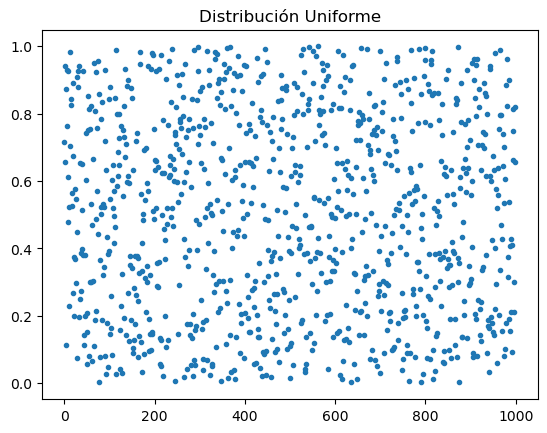

In [57]:
plt.plot(data, '.')

plt.title('Distribución Uniforme')

plt.show()

In [58]:
for ci in [0.95, 0.999]:
    print(f'El IC al {ci*100:.1f}-% es {np.float16(ud.interval(ci))}')

El IC al 95.0-% es [0.025 0.975]
El IC al 99.9-% es [5.002e-04 9.995e-01]


4. Distribuciones discretas 

1) Distribución binomial: “Según la investigación, los ojos azules puros en Europa se acercan con mayor frecuencia a Finlandia, Suecia y Noruega (72 %), seguidos de Estonia y Dinamarca (69 %); Letonia, Irlanda (66%); Escocia (63%); Lituania (61%); Holanda (58%); Bielorrusia, Inglaterra (55%); Alemania (53%); Polonia, Gales (50%); Rusia, República Checa (48%); Eslovaquia (46%); Bélgica (43%); Austria, Suiza, Ucrania (37%); Francia, Eslovenia (34%); Hungría (28%); Croacia (26%); Bosnia y Herzegovina (24%); Rumania (20%); Italia (18%); Serbia, Bulgaria (17%); España (15%); Georgia, Portugal (13%); Albania (11%); Turquía y Grecia (10%). Un análisis más detallado muestra que la incidencia promedio de ojos azules en Europa es del 34%, con un 50% en el norte de Europa y un 18% en el sur de Europa”. Si tenemos 15 estudiantes austriacos en el salón de clases, ¿cuál es la probabilidad de encontrar 3, 6 o 10 estudiantes con ojos azules?

2) Distribución de Poisson: En 2012 hubo 62 accidentes mortales en las calles de Austria. Suponiendo que se distribuyen uniformemente, tenemos un promedio de 62 /(365/7) = 1,19 accidentes fatales por semana. ¿Cuál es la probabilidad de que en una semana dada no haya 2 o 5 accidentes?

$\textbf{1)}$

In [61]:
# Parámetros 

p = 0.37

n = 15

In [62]:
# Generamos la distribución

binomial_dist = stats.binom(n, p)

In [63]:
# Seleccione los números interesantes y calcule la "Función de masa de probabilidad" (PMF)

x = [3, 6, 10]

y = binomial_dist.pmf(x)

In [64]:
# Para imprimir el resultado, usamos la función "zip" para generar pares de números

for num, solution in zip(x,y):
    print(f'La oportunidad de encontrar {num} estudiantes con ojos azules es {solution*100:4.1f}%.')

La oportunidad de encontrar 3 estudiantes con ojos azules es  9.0%.
La oportunidad de encontrar 6 estudiantes con ojos azules es 20.1%.
La oportunidad de encontrar 10 estudiantes con ojos azules es  1.4%.


$\textbf{2)}$

In [66]:
# Generamos la distribución

prob = 62/(365/7)

poisson_dist = stats.poisson(prob)

In [67]:
# Seleccione números interesantes, calcule PMF e imprima resultados

x = [0,2,5]

y = poisson_dist.pmf(x)*100

for num, solution in zip(x,y):
    print(f'La posibilidad de tener {num} accidentes fatales en una semana es {solution:4.1f}%.')

La posibilidad de tener 0 accidentes fatales en una semana es 30.5%.
La posibilidad de tener 2 accidentes fatales en una semana es 21.5%.
La posibilidad de tener 5 accidentes fatales en una semana es  0.6%.


# Apéndice 

## 1. Distribuciones discretas

### 1.1 Distribución binomial 

In [49]:
bd1 = stats.binom(20, 0.5)
bd2 = stats.binom(20, 0.7)
bd3 = stats.binom(40, 0.5)

k = np.arange(40)

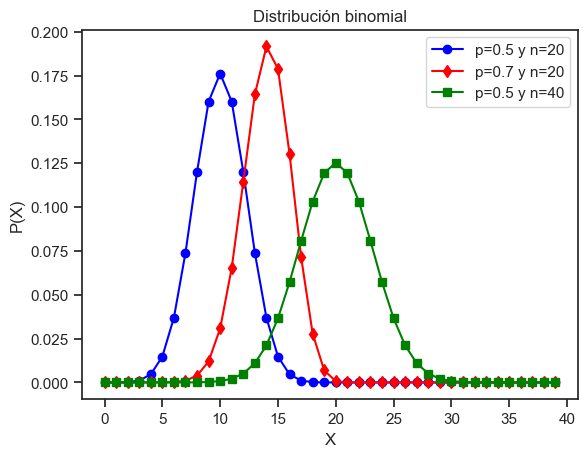

In [52]:
plt.plot(k, bd1.pmf(k), 'o-b')
plt.plot(k, bd2.pmf(k), 'd-r')
plt.plot(k, bd3.pmf(k), 's-g')

plt.title('Distribución binomial')
plt.legend(['p=0.5 y n=20', 'p=0.7 y n=20', 'p=0.5 y n=40'])
plt.xlabel('X')
plt.ylabel('P(X)')

plt.show()

#### Ejemplo

Al momento de escribir este artículo, un millón de personas han sido vacunadas contra Covid en Austria, donde la población total es de aproximadamente 9 millones. Cuando tenemos un salón de clases con 19 alumnos: 

- ¿Qué posibilidades hay de que ninguno de esos alumnos haya sido vacunado? 
- ¿Cuál es la probabilidad de que exactamente un estudiante haya sido vacunado? 
- ¿Cuál es la oportunidad para dos, etc....?

In [56]:
p = 1e6/9e6
n = 19

In [57]:
bd = stats.binom(n, p)

bd

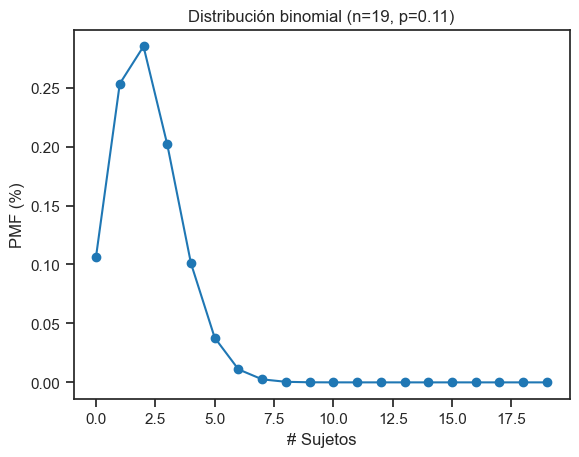

In [58]:
# PMF

subj = np.arange(start=0, stop=20)     
pmf = bd.pmf(subj)

plt.plot(subj, pmf, 'o-')

plt.xlabel('# Sujetos')
plt.ylabel('PMF (%)')

# f' indica "cadenas formateadas", y permite insertar valores formateados

plt.title(f'Distribución binomial (n={n}, p={p:4.2f})');

plt.show()

#### Ejercicio

1) Pruebe esto para números n grandes y vea cómo cambia la distribución: **Cambie a n=100 y restrinja el xlim al intervalo 0-25** 

In [59]:
n = 100

subj = np.arange(start=0, stop=n) 

bd = stats.binom(n, p)

pmf = bd.pmf(subj)

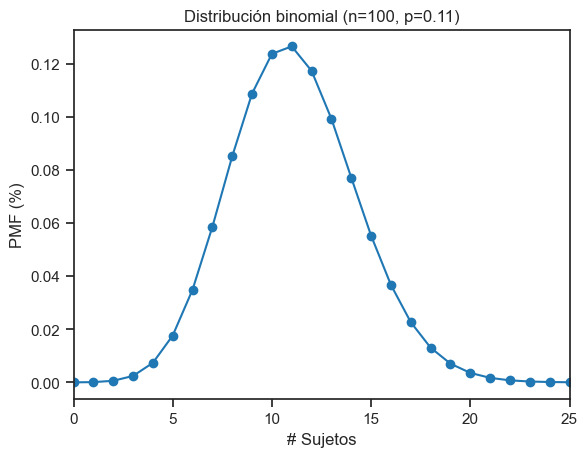

In [60]:
plt.plot(subj, pmf, 'o-')

plt.xlabel('# Sujetos')
plt.ylabel('PMF (%)')
plt.xlim(0, 25)

# f' indica "cadenas formateadas", y permite insertar valores formateados
plt.title(f'Distribución binomial (n={n}, p={p:4.2f})');

2) El 54,1 % de la población adulta austriaca tiene sobrepeso ( (aunque a la edad de 18 años, solo el 18 % de los niños y el 12 % de las niñas tienen sobrepeso). **¿Cuál es la probabilidad de que exactamente 10 de los 19 austriacos tengan sobrepeso?**

In [61]:
total = 19
p = 54.1/100    
n = 10

In [62]:
bd = stats.binom(total, p)

bd

In [63]:
p = bd.pmf(n)

print(f'La probabilidad de que exactamente {n} de {total} austriacos tengan sobrepeso es {p*100:4.1f}%')

La probabilidad de que exactamente 10 de 19 austriacos tengan sobrepeso es 17.9%


### 1.2 Distribución de Poisson

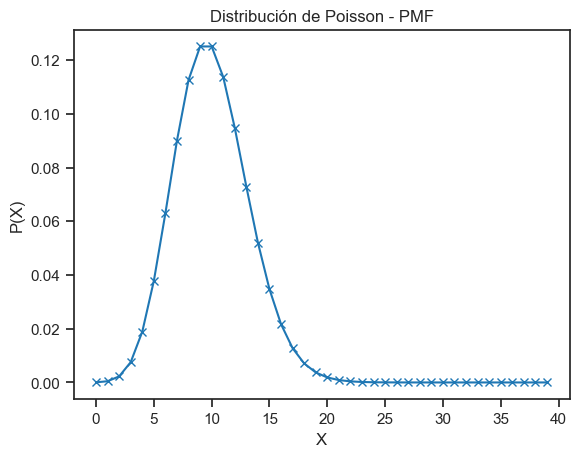

In [53]:
pd = stats.poisson(10)

plt.plot(k, pd.pmf(k),'x-')

plt.title('Distribución de Poisson - PMF')

plt.xlabel('X')
plt.ylabel('P(X)')

plt.show()

### 1.3 Diferentes puntos de vista de la distribución de Poisson

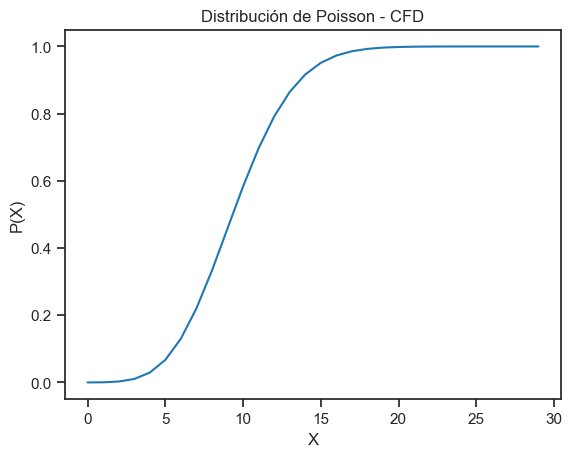

In [54]:
k = np.arange(30)

plt.plot(k, pd.cdf(k))

plt.title('Distribución de Poisson - CFD')

plt.xlabel('X')
plt.ylabel('P(X)')

plt.show()

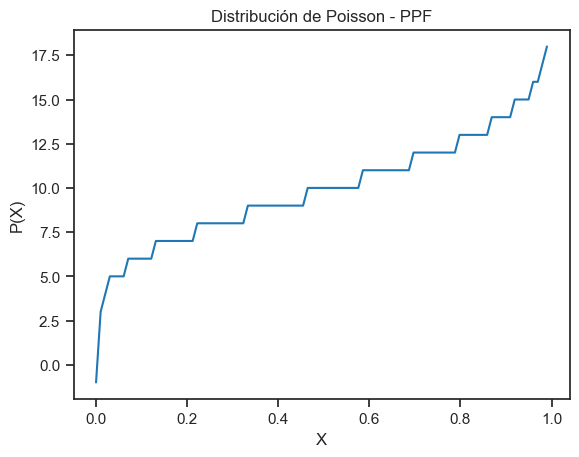

In [55]:
y = np.linspace(0,1,100)

plt.plot(y, pd.ppf(y))

plt.title('Distribución de Poisson - PPF')

plt.xlabel('X')
plt.ylabel('P(X)')

plt.show()

#### Ejemplo

En el momento de escribir este artículo, tenemos una media de 3 nuevos pacientes de Covid en Linz cada día. ¿Qué probabilidad hay de que mañana tengamos 0, 1, 2,... pacientes?

In [64]:
m = 3

pd = stats.poisson(m)

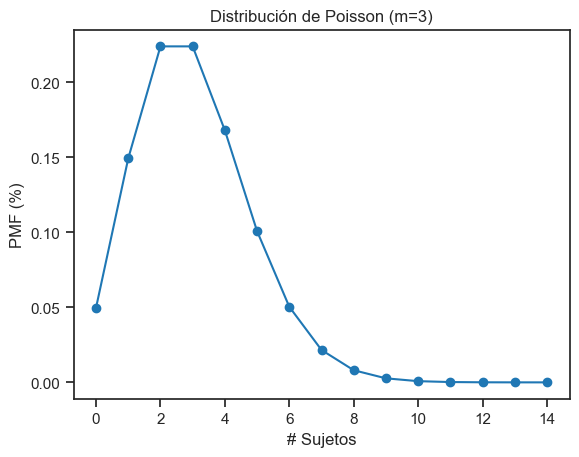

In [65]:
# Grafico

n = np.arange(15)
pmf = pd.pmf(n)

plt.plot(n, pmf, 'o-')

plt.xlabel('# Sujetos')
plt.ylabel('PMF (%)')
plt.title(f'Distribución de Poisson (m={m})')

plt.show()

#### Ejercicio

Para interpretar los datos imprimamos los valores de la probabilidad de tener [0, 1, 2, 3, 4] pacientes mañana.

In [66]:
print(f'La probabilidad de tener [0, 1, 2, 3, 4] pacientes es {np.round(pmf[:5]*100)}%')

La probabilidad de tener [0, 1, 2, 3, 4] pacientes es [ 5. 15. 22. 22. 17.]%


In [67]:
max_val = 3
cdf = 100 * pd.cdf(max_val)     

print(f'La probabilidad de tener {max_val} o menos pacientes es {cdf:4.1f}%')

La probabilidad de tener 3 o menos pacientes es 64.7%


### 1.4 Curvas interactivas

In [68]:
from ipywidgets import interactive

#### 1.4.1 Distribución Binomial Interactiva

In [69]:
def binom(n, p):
    
    plt.figure(2)
    x = np.arange(0, n)

    bd = stats.binom(n, p)
    
    plt.plot(x, bd.pmf(x), 'o-')
    
    plt.show()

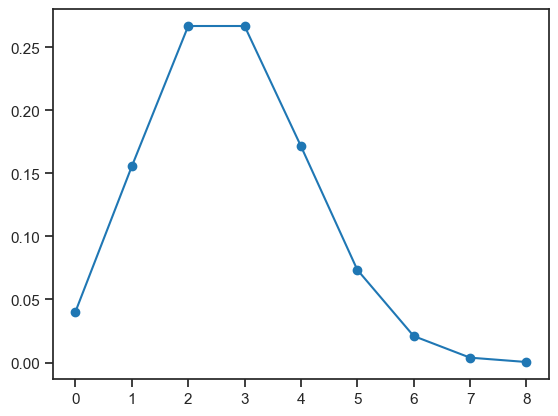

In [70]:
binom(9, 0.3)

Hasta aquí debes entender lo que está pasando.

A continuación, generamos un uso interactivo de esa función. No te preocupes por los detalles aquí. Puede obtener más información sobre ellos en https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html. Simplemente tome esto como un "repetitivo" para hacer gráficos interactivos.

In [78]:
interactive_plot = interactive(binom, n=(1, 31, 1), p=(0.0, 1, 0.01 ))

output = interactive_plot.children[-1]

output.layout.height = '450px'

interactive_plot

interactive(children=(IntSlider(value=16, description='n', max=31, min=1), FloatSlider(value=0.5, description=…

#### Ejercicio

**¿Puede generar a continuación un gráfico interactivo para la distribución de Poisson?**

In [72]:
def poisson(m):
    
    plt.figure(2)
    
    x = np.arange(0, 40)

    pd = stats.poisson(m)
    
    plt.plot(x, pd.pmf(x), 'o-')
    
    plt.show()

In [77]:
interactive_plot = interactive(poisson, m=(1, 30, 1))

output = interactive_plot.children[-1]

output.layout.height = '450px'

interactive_plot

interactive(children=(IntSlider(value=15, description='m', max=30, min=1), Output(layout=Layout(height='450px'…

## 2. Distribuciones continuas

### 2.1 Definición de función

La siguiente función se utilizará para mostrar las diferentes funciones de distribución

In [79]:
x = np.linspace(-10,10,201)

def showDistribution(d1, d2, tTxt, xTxt, yTxt, legendTxt, xmin=-10, xmax=10):
    
    plt.plot(x, d1.pdf(x))
    
    if d2 != '':
        plt.plot(x, d2.pdf(x), 'r')
        plt.legend(legendTxt)
    
    plt.xlim(xmin, xmax)
    
    plt.title(tTxt)
    
    plt.xlabel(xTxt)
    
    plt.ylabel(yTxt)
    
    plt.show()  

### 2.2 Distribución normal

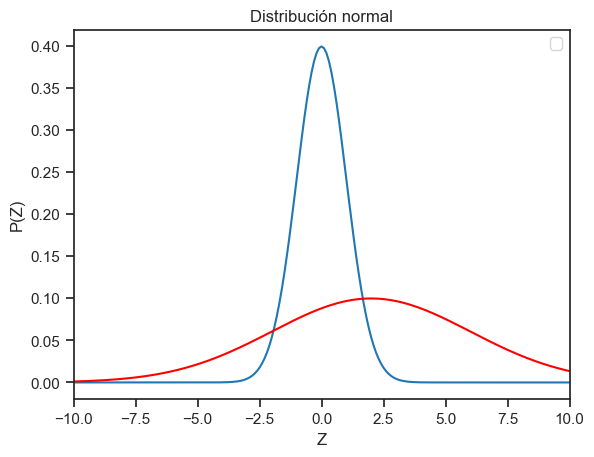

In [81]:
showDistribution(stats.norm, stats.norm(loc=2, scale=4), 'Distribución normal', 'Z', 'P(Z)','')

### 2.3 Distribución exponencial

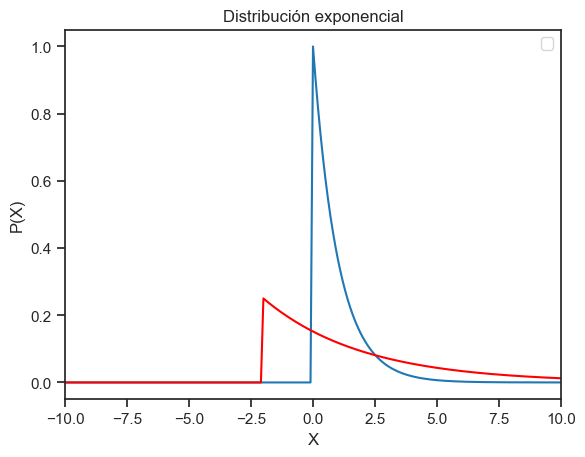

In [82]:
showDistribution(stats.expon, stats.expon(loc=-2, scale=4), 'Distribución exponencial', 'X', 'P(X)','')

### 2.4 Distribución T

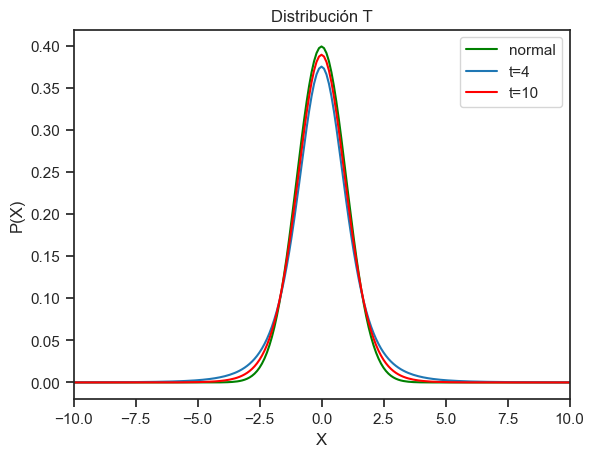

In [83]:
# Con 4, y 10 DOF

plt.plot(x, stats.norm.pdf(x), 'g')

showDistribution(stats.t(4), stats.t(10), 'Distribución T', 'X', 'P(X)',['normal', 't=4', 't=10'])

### 2.5 Distribución F

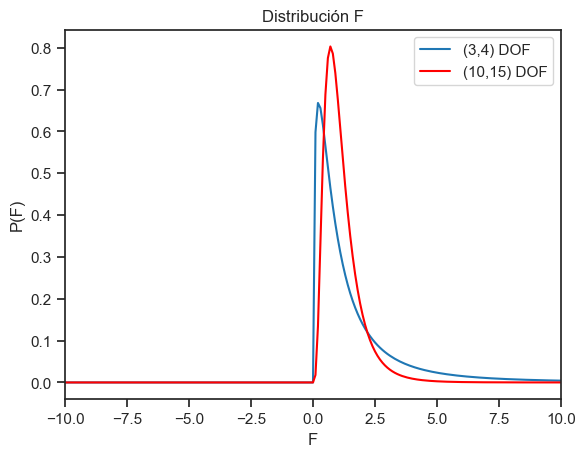

In [84]:
# Con (3,4) y (10,15) DOF

showDistribution(stats.f(3,4), stats.f(10,15), 'Distribución F', 'F', 'P(F)',['(3,4) DOF', '(10,15) DOF'])

### 2.6 Distribución uniforme

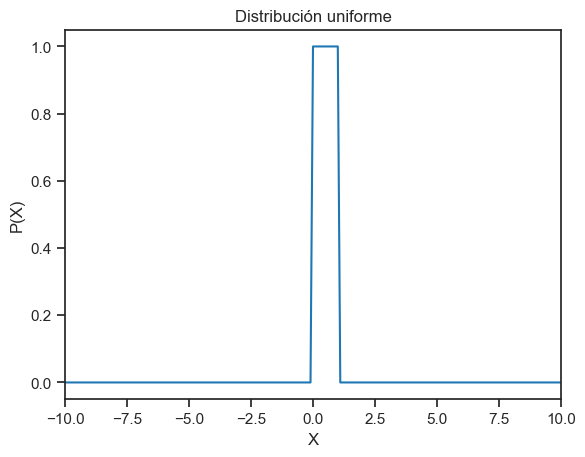

In [85]:
showDistribution(stats.uniform,'' , 'Distribución uniforme', 'X', 'P(X)','')

### 2.7 Distribución logística

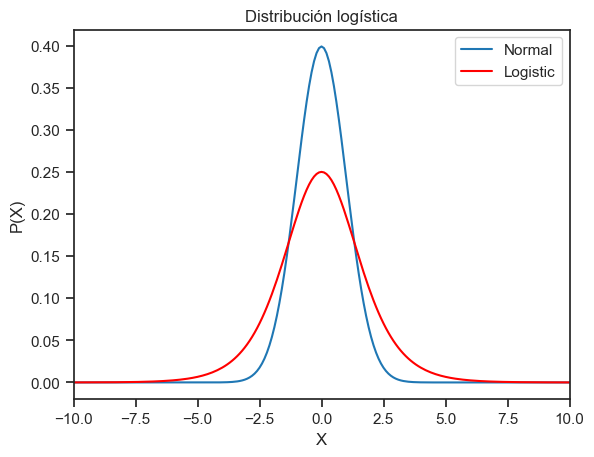

In [86]:
showDistribution(stats.norm, stats.logistic, 'Distribución logística', 'X', 'P(X)',['Normal', 'Logistic'])

### 2.8 Distribución lognormal

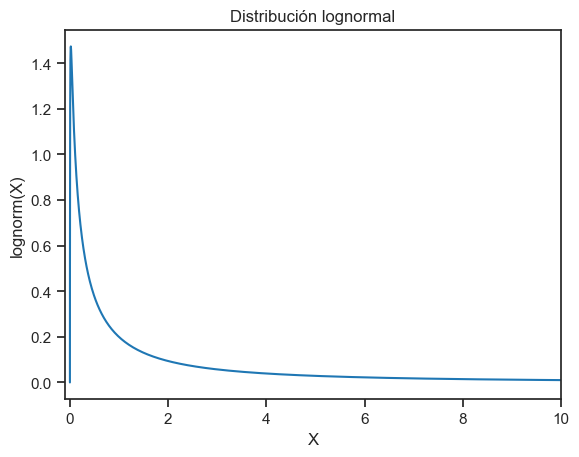

In [88]:
x = np.logspace(-9,1,1001)+1e-9

showDistribution(stats.lognorm(2), '', 'Distribución lognormal', 'X', 'lognorm(X)','', xmin=-0.1)

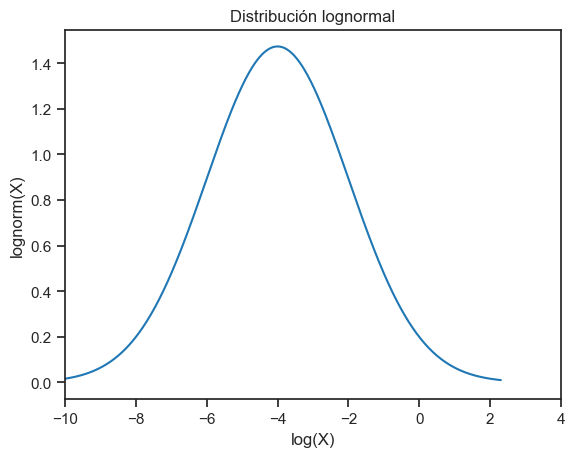

In [90]:
# El gráfico log-lin tiene que hacerse a mano:

plt.plot(np.log(x), stats.lognorm.pdf(x,2))

plt.xlim(-10, 4)

plt.title('Distribución lognormal')
plt.xlabel('log(X)')
plt.ylabel('lognorm(X)')

plt.show()

## 3. Distribución normal 

### 3.1 Representaciones diferentes

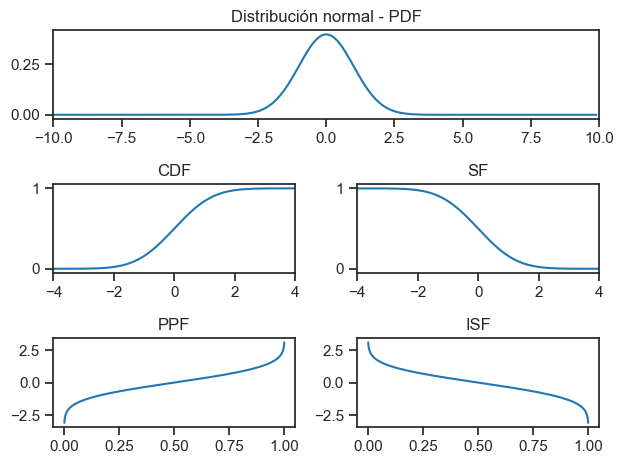

In [27]:
# Datos

x = np.r_[-10:10:0.1]
rv = stats.norm(0,1)   

x2 = np.r_[0:1:0.001]

ax = plt.subplot2grid((3,2),(0,0), colspan=2)
plt.plot(x,rv.pdf(x))
plt.xlim([-10,10])
plt.title('Distribución normal - PDF')

plt.subplot(323)
plt.plot(x,rv.cdf(x))
plt.xlim([-4,4])
plt.title('CDF')

plt.subplot(324)
plt.plot(x,rv.sf(x))
plt.xlim([-4,4])
plt.title('SF')

plt.subplot(325)
plt.plot(x2,rv.ppf(x2))
plt.title('PPF')

plt.subplot(326)
plt.plot(x2,rv.isf(x2))
plt.title('ISF')

plt.tight_layout()

plt.show()    

### 3.2 Distribución desplazada

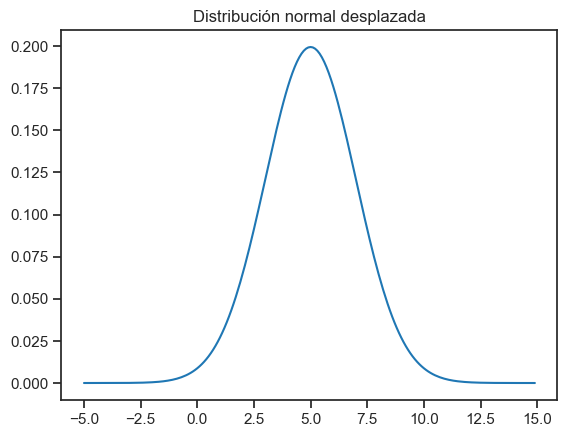

In [29]:
# Datos
x = np.arange(-5,15,0.1)

myMean = 5
mySD = 2

y = stats.norm(myMean, mySD).pdf(x)

plt.plot(x,y)

plt.title('Distribución normal desplazada')

plt.show()

### 3.3 Números aleatorios con distribución normal

In [30]:
numData = 500

data = stats.norm.rvs(myMean, mySD, size = numData)

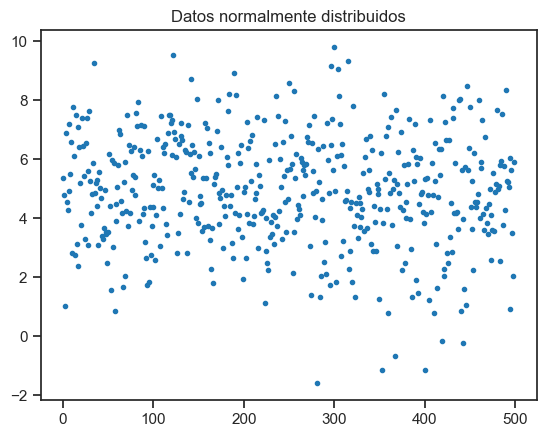

In [31]:
plt.plot(data, '.')

plt.title('Datos normalmente distribuidos')

plt.show()

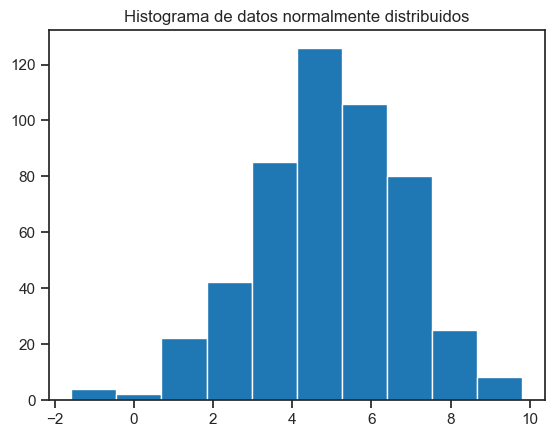

In [32]:
plt.hist(data)

plt.title('Histograma de datos normalmente distribuidos')

plt.show()

### 3.4 Distribuciones de muestras normales múltiples

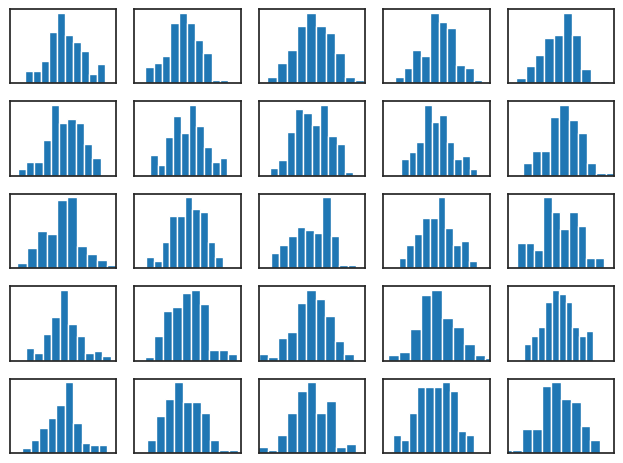

In [33]:
# Haga esto 25 veces y muestre los histogramas

numRows = 5
numData = 100

for i in range(numRows):
    for j in range(numRows):
        data = stats.norm.rvs(myMean, mySD, size=numData)
        plt.subplot(numRows,numRows,numRows*i+j+1)
        plt.hist(data)

        plt.xticks([])
        plt.yticks([])
        plt.xlim(myMean-3*mySD, myMean+3*mySD)

plt.tight_layout()

plt.show()

In [34]:
# Compruebe la media de 1000 muestras normalmente distribuidas

numTrials = 1000;
numData = 100
myMeans = np.ones(numTrials)*np.nan
for i in range(numTrials):
    data = stats.norm.rvs(myMean, mySD, size=numData)
    myMeans[i] = np.mean(data)
print(f'El error estándar de la media, con {numData} muestras, es {np.std(myMeans, ddof=1):5.3f}')

El error estándar de la media, con 100 muestras, es 0.199


### 3.5 Comprobación de normalidad

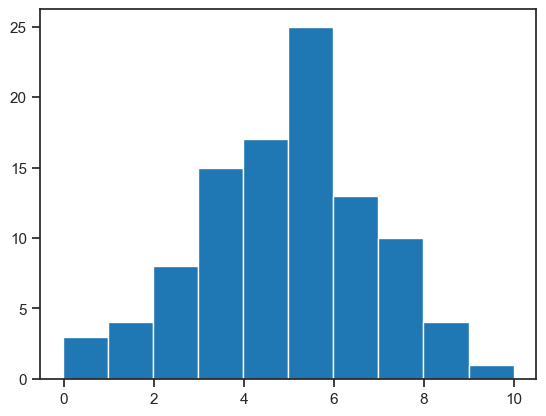

In [35]:
# Generar y mostrar una distribución.

numData = 100

data = stats.norm.rvs(myMean, mySD, size=numData)

plt.hist(data);

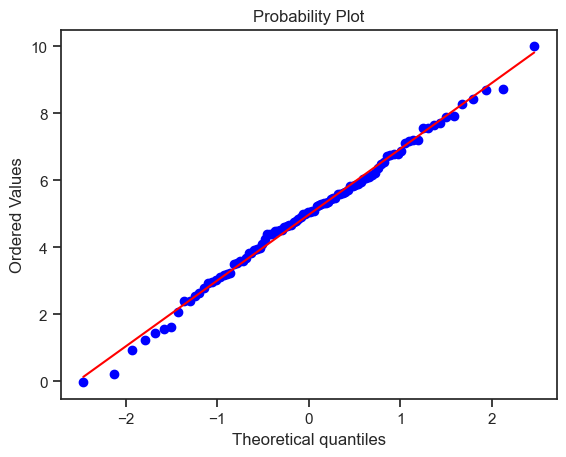

In [36]:
# Prueba gráfica: si los datos se encuentran en una línea, tienen una distribución bastante normal

_ = stats.probplot(data, plot=plt)

In [37]:
# La "prueba normal" de Scipy se basa en la prueba de D'Agostino y Pearson que combina sesgo y curtosis 
# para producir una prueba general de normalidad.

_, pVal = stats.normaltest(data)

In [38]:
if pVal > 0.05:
    print('Los datos probablemente se distribuyen normalmente')
else: 
    print('Los datos probablemente no se distribuyen normalmente')

Los datos probablemente se distribuyen normalmente


In [39]:
# O puede verificar la normalidad con la prueba de Kolmogorov-Smirnov:
# ¡pero esto solo es recomendable para un gran número de muestras!

_,pVal = stats.kstest((data-np.mean(data))/np.std(data,ddof=1), 'norm')

In [40]:
if pVal > 0.05:
    print('Los datos probablemente se distribuyen normalmente')
else: 
    print('Los datos probablemente no se distribuyen normalmente')

Los datos probablemente se distribuyen normalmente


### 3.6 Valores de la función de distribución acumulativa

In [41]:
# Generar datos aleatorios normalmente distribuidos
myMean = 5
mySD = 2
numData = 1000
data = stats.norm.rvs(myMean, mySD, size=numData)

# Calcular la función de distribución acumulativa, CDF
numbins = 20
counts, bin_edges = np.histogram(data, bins=numbins, density=True)
cdf = np.cumsum(counts)
cdf /= max(cdf)

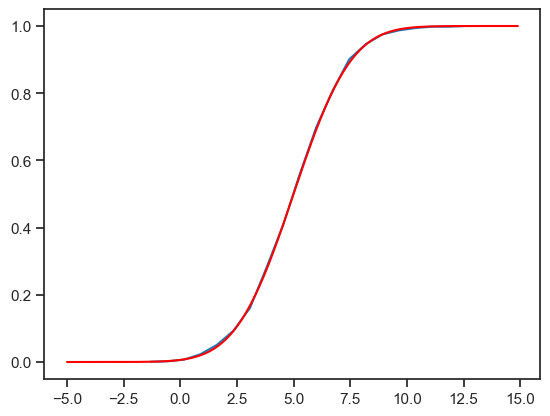

In [42]:
# Comparar con la CDF exacta

plt.plot(bin_edges[1:],cdf)
plt.plot(x, stats.norm.cdf(x, myMean, mySD),'r')

plt.show()

In [43]:
# Averigüe el valor correspondiente al x-ésimo percentil: la "función de distribución acumulativa"

value = 2
myMean = 5
mySD = 2

cdf = stats.norm.cdf(value, myMean, mySD)

print(f'Con un umbral de {value:4.2f}, obtienes {round(cdf*100)}% de los datos')

Con un umbral de 2.00, obtienes 7% de los datos


In [44]:
# Para el percentil correspondiente a un determinado valor: la "función de distribución acumulativa inversa"

value = 0.025

icdf = stats.norm.isf(value, myMean, mySD)

print(f'Para obtener {(1-value)*100}% de los datos, necesitas un umbral de {icdf:4.2f}.')

Para obtener 97.5% de los datos, necesitas un umbral de 8.92.


### 3.7 Ejercicio

Un *índice de masa corporal (IMC)* >25 indica sobrepeso, >30 indica obesidad. 

Para los hombres austriacos, el IMC promedio es 26,5 (DE = 4,0); para las mujeres es 24,4 (DE=4,4).

Trace la distribución del peso de las niñas austriacas de 18 años.

In [45]:
# Definición de una distribución normal

mean = 24.4
sd = 4.4
nd = stats.norm(mean, sd) 

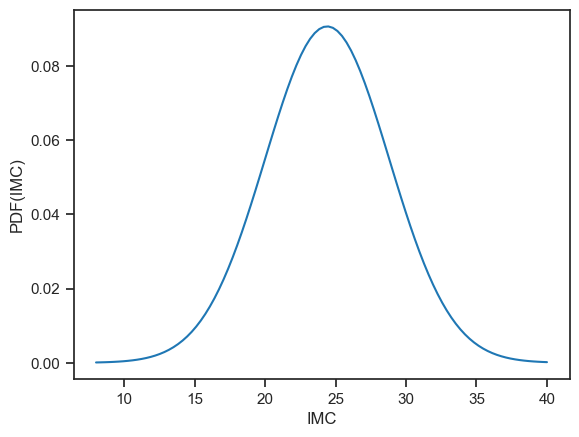

In [47]:
bmi = np.linspace(8, 40, 100)
pdf = nd.pdf(bmi)

plt.plot(bmi, pdf)

plt.xlabel('IMC')
plt.ylabel('PDF(IMC)')

plt.show()